# import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Read the dataset

In [3]:
df=pd.read_csv(r"C:\Users\USER\Desktop\HomeC.csv",low_memory=False)

In [4]:
df.head(10)

time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0  1451624400  0.932833  0.003483            0.932833         0.000033   
1  1451624401  0.934333  0.003467            0.934333         0.000000   
2  1451624402  0.931817  0.003467            0.931817         0.000017   
3  1451624403  1.022050  0.003483            1.022050         0.000017   
4  1451624404  1.139400  0.003467            1.139400         0.000133   
5  1451624405  1.391867  0.003433            1.391867         0.000283   
6  1451624406  1.366217  0.003450            1.366217         0.000283   
7  1451624407  1.431900  0.003417            1.431900         0.000250   
8  1451624408  1.627300  0.003417            1.627300         0.000183   
9  1451624409  1.735383  0.003417            1.735383         0.000017   

   Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0        0.020700        0.061917          0.442633     0.124150   
1        0.020717        0.063817          0.444067     0.124000   
2        0.020700        0.062317          0.446067     0.123533   
3        0.106900        0.068517          0.446583     0.123133   
4        0.236933        0.063983          0.446533     0.122850   
5        0.503250        0.063667          0.447033     0.122300   
6        0.499400        0.063717          0.443267     0.122050   
7        0.477867        0.178633          0.444283     0.121800   
8        0.447650        0.365700          0.441467     0.121617   
9        0.171550        0.682500          0.438733     0.121633   

   Wine cellar [kW]  ...  visibility  summary  apparentTemperature  pressure  \
0          0.006983  ...        10.0    Clear                29.26   1016.91   
1          0.006983  ...        10.0    Clear                29.26   1016.91   
2          0.006983  ...        10.0    Clear                29.26   1016.91   
3          0.006983  ...        10.0    Clear                29.26   1016.91   
4          0.006850  ...        10.0    Clear                29.26   1016.91   
5          0.006717  ...        10.0    Clear                29.26   1016.91   
6          0.006733  ...        10.0    Clear                29.26   1016.91   
7          0.006783  ...        10.0    Clear                29.26   1016.91   
8          0.006950  ...        10.0    Clear                29.26   1016.91   
9          0.007233  ...        10.0    Clear                29.26   1016.91   

   windSpeed  cloudCover  windBearing  precipIntensity  dewPoint  \
0       9.18  cloudCover        282.0              0.0      24.4   
1       9.18  cloudCover        282.0              0.0      24.4   
2       9.18  cloudCover        282.0              0.0      24.4   
3       9.18  cloudCover        282.0              0.0      24.4   
4       9.18  cloudCover        282.0              0.0      24.4   
5       9.18  cloudCover        282.0              0.0      24.4   
6       9.18  cloudCover        282.0              0.0      24.4   
7       9.18  cloudCover        282.0              0.0      24.4   
8       9.18  cloudCover        282.0              0.0      24.4   
9       9.18  cloudCover        282.0              0.0      24.4   

   precipProbability  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
5                0.0  
6                0.0  
7                0.0  
8                0.0  
9                0.0  

[10 rows x 32 columns]

# Expolaratory Data Analysis

## Check the columns

In [5]:
df.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

## Remove unit from column names

In [6]:
df.columns=[i.replace(' [kW]','') for i in df.columns]

In [7]:
df.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

## Sum value of 2 furnaces and 3 kitchen and make it to single columns

In [8]:
df['Furnace'] = df[['Furnace 1','Furnace 2']].sum(axis=1)
df['Kitchen'] = df[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1)

In [9]:
df.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'Furnace', 'Kitchen'],
      dtype='object')

## Drop additional columns of furnaces and kitchen

In [10]:
df.drop(['Furnace 1','Furnace 2','Kitchen 12', 'Kitchen 14', 'Kitchen 38'],axis=1,inplace=True)

In [11]:
df.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Home office',
       'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'Furnace', 'Kitchen'],
      dtype='object')

## Check for null values

In [12]:
df.isnull().sum()

time                   0
use                    1
gen                    1
House overall          1
Dishwasher             1
Home office            1
Fridge                 1
Wine cellar            1
Garage door            1
Barn                   1
Well                   1
Microwave              1
Living room            1
Solar                  1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
Furnace                0
Kitchen                0
dtype: int64

## Remove invalid rows

In [13]:
df[df.isnull().any(axis=1)]

time  use  gen  House overall  Dishwasher  Home office  Fridge  \
503910    \  NaN  NaN            NaN         NaN          NaN     NaN   

        Wine cellar  Garage door  Barn  ...  apparentTemperature  pressure  \
503910          NaN          NaN   NaN  ...                  NaN       NaN   

        windSpeed  cloudCover  windBearing precipIntensity  dewPoint  \
503910        NaN         NaN          NaN             NaN       NaN   

        precipProbability Furnace  Kitchen  
503910                NaN     0.0      0.0  

[1 rows x 29 columns]

In [14]:
df = df.drop(503910, axis=0)

In [15]:
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [time, use, gen, House overall, Dishwasher, Home office, Fridge, Wine cellar, Garage door, Barn, Well, Microwave, Living room, Solar, temperature, icon, humidity, visibility, summary, apparentTemperature, pressure, windSpeed, cloudCover, windBearing, precipIntensity, dewPoint, precipProbability, Furnace, Kitchen]
Index: []

[0 rows x 29 columns]

## Adjust for mistake values in Cloudcover column

In [16]:
df['cloudCover'] = df['cloudCover'].replace('cloudCover', np.nan)

In [17]:
df.head(10)

time       use       gen  House overall  Dishwasher  Home office  \
0  1451624400  0.932833  0.003483       0.932833    0.000033     0.442633   
1  1451624401  0.934333  0.003467       0.934333    0.000000     0.444067   
2  1451624402  0.931817  0.003467       0.931817    0.000017     0.446067   
3  1451624403  1.022050  0.003483       1.022050    0.000017     0.446583   
4  1451624404  1.139400  0.003467       1.139400    0.000133     0.446533   
5  1451624405  1.391867  0.003433       1.391867    0.000283     0.447033   
6  1451624406  1.366217  0.003450       1.366217    0.000283     0.443267   
7  1451624407  1.431900  0.003417       1.431900    0.000250     0.444283   
8  1451624408  1.627300  0.003417       1.627300    0.000183     0.441467   
9  1451624409  1.735383  0.003417       1.735383    0.000017     0.438733   

     Fridge  Wine cellar  Garage door      Barn  ...  apparentTemperature  \
0  0.124150     0.006983     0.013083  0.031350  ...                29.26   
1  0.124000     0.006983     0.013117  0.031500  ...                29.26   
2  0.123533     0.006983     0.013083  0.031517  ...                29.26   
3  0.123133     0.006983     0.013000  0.031500  ...                29.26   
4  0.122850     0.006850     0.012783  0.031500  ...                29.26   
5  0.122300     0.006717     0.012433  0.031450  ...                29.26   
6  0.122050     0.006733     0.012417  0.031550  ...                29.26   
7  0.121800     0.006783     0.012550  0.031733  ...                29.26   
8  0.121617     0.006950     0.012717  0.031767  ...                29.26   
9  0.121633     0.007233     0.013350  0.031667  ...                29.26   

   pressure  windSpeed  cloudCover  windBearing precipIntensity  dewPoint  \
0   1016.91       9.18         NaN        282.0             0.0      24.4   
1   1016.91       9.18         NaN        282.0             0.0      24.4   
2   1016.91       9.18         NaN        282.0             0.0      24.4   
3   1016.91       9.18         NaN        282.0             0.0      24.4   
4   1016.91       9.18         NaN        282.0             0.0      24.4   
5   1016.91       9.18         NaN        282.0             0.0      24.4   
6   1016.91       9.18         NaN        282.0             0.0      24.4   
7   1016.91       9.18         NaN        282.0             0.0      24.4   
8   1016.91       9.18         NaN        282.0             0.0      24.4   
9   1016.91       9.18         NaN        282.0             0.0      24.4   

   precipProbability   Furnace   Kitchen  
0                0.0  0.082617  0.000567  
1                0.0  0.084533  0.000567  
2                0.0  0.083017  0.000617  
3                0.0  0.175417  0.000650  
4                0.0  0.300917  0.000783  
5                0.0  0.566917  0.001050  
6                0.0  0.563117  0.001067  
7                0.0  0.656500  0.000933  
8                0.0  0.813350  0.000783  
9                0.0  0.854050  0.000417  

[10 rows x 29 columns]

In [18]:
df.isnull().sum()

time                    0
use                     0
gen                     0
House overall           0
Dishwasher              0
Home office             0
Fridge                  0
Wine cellar             0
Garage door             0
Barn                    0
Well                    0
Microwave               0
Living room             0
Solar                   0
temperature             0
icon                    0
humidity                0
visibility              0
summary                 0
apparentTemperature     0
pressure                0
windSpeed               0
cloudCover             58
windBearing             0
precipIntensity         0
dewPoint                0
precipProbability       0
Furnace                 0
Kitchen                 0
dtype: int64

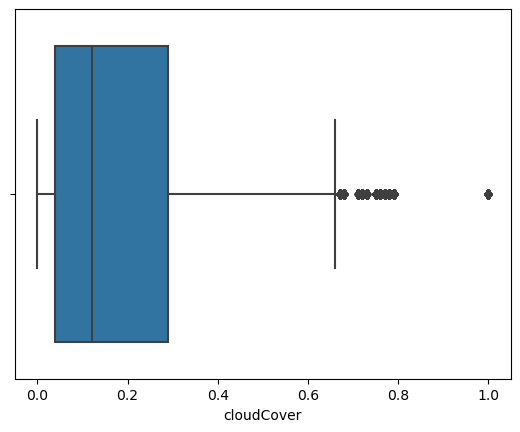

In [19]:
df['cloudCover'] = pd.to_numeric(df['cloudCover'])
sns.boxplot(x=df['cloudCover'])
plt.show()

In [20]:
df['cloudCover'].describe()

count    503852.000000
mean          0.225885
std           0.289907
min           0.000000
25%           0.040000
50%           0.120000
75%           0.290000
max           1.000000
Name: cloudCover, dtype: float64

In [21]:
cloudCover_median = df['cloudCover'].median()                       # Since the "cloudCover" value has outliers, the missing values was
df['cloudCover'].fillna(cloudCover_median, inplace=True)            # replaced with median

In [22]:
df.isnull().sum()

time                   0
use                    0
gen                    0
House overall          0
Dishwasher             0
Home office            0
Fridge                 0
Wine cellar            0
Garage door            0
Barn                   0
Well                   0
Microwave              0
Living room            0
Solar                  0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
Furnace                0
Kitchen                0
dtype: int64

In [23]:
df.head()

time       use       gen  House overall  Dishwasher  Home office  \
0  1451624400  0.932833  0.003483       0.932833    0.000033     0.442633   
1  1451624401  0.934333  0.003467       0.934333    0.000000     0.444067   
2  1451624402  0.931817  0.003467       0.931817    0.000017     0.446067   
3  1451624403  1.022050  0.003483       1.022050    0.000017     0.446583   
4  1451624404  1.139400  0.003467       1.139400    0.000133     0.446533   

     Fridge  Wine cellar  Garage door      Barn  ...  apparentTemperature  \
0  0.124150     0.006983     0.013083  0.031350  ...                29.26   
1  0.124000     0.006983     0.013117  0.031500  ...                29.26   
2  0.123533     0.006983     0.013083  0.031517  ...                29.26   
3  0.123133     0.006983     0.013000  0.031500  ...                29.26   
4  0.122850     0.006850     0.012783  0.031500  ...                29.26   

   pressure  windSpeed  cloudCover  windBearing precipIntensity  dewPoint  \
0   1016.91       9.18        0.12        282.0             0.0      24.4   
1   1016.91       9.18        0.12        282.0             0.0      24.4   
2   1016.91       9.18        0.12        282.0             0.0      24.4   
3   1016.91       9.18        0.12        282.0             0.0      24.4   
4   1016.91       9.18        0.12        282.0             0.0      24.4   

   precipProbability   Furnace   Kitchen  
0                0.0  0.082617  0.000567  
1                0.0  0.084533  0.000567  
2                0.0  0.083017  0.000617  
3                0.0  0.175417  0.000650  
4                0.0  0.300917  0.000783  

[5 rows x 29 columns]

## Label encode summary column

In [24]:
le = LabelEncoder()
df['summary'] = le.fit_transform(df['summary'])

y = df['summary']


In [25]:
y.head()

0    3
1    3
2    3
3    3
4    3
Name: summary, dtype: int32

In [26]:
df['summary'].unique()

array([ 3, 12, 13, 14,  4, 10, 15, 11,  6,  0, 17, 16,  8,  1,  2,  7,  5,
        9])

In [27]:
df['summary'].dtype

dtype('int32')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503910 entries, 0 to 503909
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503910 non-null  object 
 1   use                  503910 non-null  float64
 2   gen                  503910 non-null  float64
 3   House overall        503910 non-null  float64
 4   Dishwasher           503910 non-null  float64
 5   Home office          503910 non-null  float64
 6   Fridge               503910 non-null  float64
 7   Wine cellar          503910 non-null  float64
 8   Garage door          503910 non-null  float64
 9   Barn                 503910 non-null  float64
 10  Well                 503910 non-null  float64
 11  Microwave            503910 non-null  float64
 12  Living room          503910 non-null  float64
 13  Solar                503910 non-null  float64
 14  temperature          503910 non-null  float64
 15  icon             

In [29]:
df.drop(['icon'],axis=1,inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503910 entries, 0 to 503909
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503910 non-null  object 
 1   use                  503910 non-null  float64
 2   gen                  503910 non-null  float64
 3   House overall        503910 non-null  float64
 4   Dishwasher           503910 non-null  float64
 5   Home office          503910 non-null  float64
 6   Fridge               503910 non-null  float64
 7   Wine cellar          503910 non-null  float64
 8   Garage door          503910 non-null  float64
 9   Barn                 503910 non-null  float64
 10  Well                 503910 non-null  float64
 11  Microwave            503910 non-null  float64
 12  Living room          503910 non-null  float64
 13  Solar                503910 non-null  float64
 14  temperature          503910 non-null  float64
 15  humidity         

In [31]:
df['time']=pd.to_datetime(df['time'], unit='s')

In [32]:
df.head(10)

time       use       gen  House overall  Dishwasher  \
0 2016-01-01 05:00:00  0.932833  0.003483       0.932833    0.000033   
1 2016-01-01 05:00:01  0.934333  0.003467       0.934333    0.000000   
2 2016-01-01 05:00:02  0.931817  0.003467       0.931817    0.000017   
3 2016-01-01 05:00:03  1.022050  0.003483       1.022050    0.000017   
4 2016-01-01 05:00:04  1.139400  0.003467       1.139400    0.000133   
5 2016-01-01 05:00:05  1.391867  0.003433       1.391867    0.000283   
6 2016-01-01 05:00:06  1.366217  0.003450       1.366217    0.000283   
7 2016-01-01 05:00:07  1.431900  0.003417       1.431900    0.000250   
8 2016-01-01 05:00:08  1.627300  0.003417       1.627300    0.000183   
9 2016-01-01 05:00:09  1.735383  0.003417       1.735383    0.000017   

   Home office    Fridge  Wine cellar  Garage door      Barn  ...  \
0     0.442633  0.124150     0.006983     0.013083  0.031350  ...   
1     0.444067  0.124000     0.006983     0.013117  0.031500  ...   
2     0.446067  0.123533     0.006983     0.013083  0.031517  ...   
3     0.446583  0.123133     0.006983     0.013000  0.031500  ...   
4     0.446533  0.122850     0.006850     0.012783  0.031500  ...   
5     0.447033  0.122300     0.006717     0.012433  0.031450  ...   
6     0.443267  0.122050     0.006733     0.012417  0.031550  ...   
7     0.444283  0.121800     0.006783     0.012550  0.031733  ...   
8     0.441467  0.121617     0.006950     0.012717  0.031767  ...   
9     0.438733  0.121633     0.007233     0.013350  0.031667  ...   

   apparentTemperature  pressure  windSpeed  cloudCover  windBearing  \
0                29.26   1016.91       9.18        0.12        282.0   
1                29.26   1016.91       9.18        0.12        282.0   
2                29.26   1016.91       9.18        0.12        282.0   
3                29.26   1016.91       9.18        0.12        282.0   
4                29.26   1016.91       9.18        0.12        282.0   
5                29.26   1016.91       9.18        0.12        282.0   
6                29.26   1016.91       9.18        0.12        282.0   
7                29.26   1016.91       9.18        0.12        282.0   
8                29.26   1016.91       9.18        0.12        282.0   
9                29.26   1016.91       9.18        0.12        282.0   

   precipIntensity  dewPoint  precipProbability   Furnace   Kitchen  
0              0.0      24.4                0.0  0.082617  0.000567  
1              0.0      24.4                0.0  0.084533  0.000567  
2              0.0      24.4                0.0  0.083017  0.000617  
3              0.0      24.4                0.0  0.175417  0.000650  
4              0.0      24.4                0.0  0.300917  0.000783  
5              0.0      24.4                0.0  0.566917  0.001050  
6              0.0      24.4                0.0  0.563117  0.001067  
7              0.0      24.4                0.0  0.656500  0.000933  
8              0.0      24.4                0.0  0.813350  0.000783  
9              0.0      24.4                0.0  0.854050  0.000417  

[10 rows x 28 columns]

## Change the time frequency from seconds to minutes

In [33]:
df['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(df),  freq='min'))
df.head(3)

time       use       gen  House overall  Dishwasher  \
0 2016-01-01 05:00:00  0.932833  0.003483       0.932833    0.000033   
1 2016-01-01 05:01:00  0.934333  0.003467       0.934333    0.000000   
2 2016-01-01 05:02:00  0.931817  0.003467       0.931817    0.000017   

   Home office    Fridge  Wine cellar  Garage door      Barn  ...  \
0     0.442633  0.124150     0.006983     0.013083  0.031350  ...   
1     0.444067  0.124000     0.006983     0.013117  0.031500  ...   
2     0.446067  0.123533     0.006983     0.013083  0.031517  ...   

   apparentTemperature  pressure  windSpeed  cloudCover  windBearing  \
0                29.26   1016.91       9.18        0.12        282.0   
1                29.26   1016.91       9.18        0.12        282.0   
2                29.26   1016.91       9.18        0.12        282.0   

   precipIntensity  dewPoint  precipProbability   Furnace   Kitchen  
0              0.0      24.4                0.0  0.082617  0.000567  
1              0.0      24.4                0.0  0.084533  0.000567  
2              0.0      24.4                0.0  0.083017  0.000617  

[3 rows x 28 columns]

In [34]:
df.shape

(503910, 28)

## Seperate year, month, day, day of week,week hour and minute form time column

In [35]:
df['year'] = df['time'].apply(lambda x : x.year)
df['month'] = df['time'].apply(lambda x : x.month)
df['day'] = df['time'].apply(lambda x : x.day)
df['weekday'] = df['time'].apply(lambda x : x.day_name())
df['weekofyear'] = df['time'].apply(lambda x : x.week)
df['hour'] = df['time'].apply(lambda x : x.hour)
df['minute'] = df['time'].apply(lambda x : x.minute)

In [36]:
df.head(10)

time       use       gen  House overall  Dishwasher  \
0 2016-01-01 05:00:00  0.932833  0.003483       0.932833    0.000033   
1 2016-01-01 05:01:00  0.934333  0.003467       0.934333    0.000000   
2 2016-01-01 05:02:00  0.931817  0.003467       0.931817    0.000017   
3 2016-01-01 05:03:00  1.022050  0.003483       1.022050    0.000017   
4 2016-01-01 05:04:00  1.139400  0.003467       1.139400    0.000133   
5 2016-01-01 05:05:00  1.391867  0.003433       1.391867    0.000283   
6 2016-01-01 05:06:00  1.366217  0.003450       1.366217    0.000283   
7 2016-01-01 05:07:00  1.431900  0.003417       1.431900    0.000250   
8 2016-01-01 05:08:00  1.627300  0.003417       1.627300    0.000183   
9 2016-01-01 05:09:00  1.735383  0.003417       1.735383    0.000017   

   Home office    Fridge  Wine cellar  Garage door      Barn  ...  \
0     0.442633  0.124150     0.006983     0.013083  0.031350  ...   
1     0.444067  0.124000     0.006983     0.013117  0.031500  ...   
2     0.446067  0.123533     0.006983     0.013083  0.031517  ...   
3     0.446583  0.123133     0.006983     0.013000  0.031500  ...   
4     0.446533  0.122850     0.006850     0.012783  0.031500  ...   
5     0.447033  0.122300     0.006717     0.012433  0.031450  ...   
6     0.443267  0.122050     0.006733     0.012417  0.031550  ...   
7     0.444283  0.121800     0.006783     0.012550  0.031733  ...   
8     0.441467  0.121617     0.006950     0.012717  0.031767  ...   
9     0.438733  0.121633     0.007233     0.013350  0.031667  ...   

   precipProbability   Furnace   Kitchen  year  month  day  weekday  \
0                0.0  0.082617  0.000567  2016      1    1   Friday   
1                0.0  0.084533  0.000567  2016      1    1   Friday   
2                0.0  0.083017  0.000617  2016      1    1   Friday   
3                0.0  0.175417  0.000650  2016      1    1   Friday   
4                0.0  0.300917  0.000783  2016      1    1   Friday   
5                0.0  0.566917  0.001050  2016      1    1   Friday   
6                0.0  0.563117  0.001067  2016      1    1   Friday   
7                0.0  0.656500  0.000933  2016      1    1   Friday   
8                0.0  0.813350  0.000783  2016      1    1   Friday   
9                0.0  0.854050  0.000417  2016      1    1   Friday   

   weekofyear  hour  minute  
0          53     5       0  
1          53     5       1  
2          53     5       2  
3          53     5       3  
4          53     5       4  
5          53     5       5  
6          53     5       6  
7          53     5       7  
8          53     5       8  
9          53     5       9  

[10 rows x 35 columns]

In [37]:
def day_timing(x):
    if x in [22,23,0,1,2,3]:
        timing = 'Night'
    elif x in range(4, 12):
        timing = 'Morning'
    elif x in range(12, 17):
        timing = 'Afternoon'
    elif x in range(17, 22):
        timing = 'Evening'
    else:
        timing = 'X'
    return timing

## Make timing column from hour column

In [38]:
df['timing'] = df['hour'].apply(day_timing)
df.head(3)

time       use       gen  House overall  Dishwasher  \
0 2016-01-01 05:00:00  0.932833  0.003483       0.932833    0.000033   
1 2016-01-01 05:01:00  0.934333  0.003467       0.934333    0.000000   
2 2016-01-01 05:02:00  0.931817  0.003467       0.931817    0.000017   

   Home office    Fridge  Wine cellar  Garage door      Barn  ...   Furnace  \
0     0.442633  0.124150     0.006983     0.013083  0.031350  ...  0.082617   
1     0.444067  0.124000     0.006983     0.013117  0.031500  ...  0.084533   
2     0.446067  0.123533     0.006983     0.013083  0.031517  ...  0.083017   

    Kitchen  year  month  day  weekday  weekofyear  hour  minute   timing  
0  0.000567  2016      1    1   Friday          53     5       0  Morning  
1  0.000567  2016      1    1   Friday          53     5       1  Morning  
2  0.000617  2016      1    1   Friday          53     5       2  Morning  

[3 rows x 36 columns]

## Check correlation between variables and remove highly correlated columns

In [39]:
corr1 = df['use'].corr(df['House overall'])
corr2 = df['gen'].corr(df['Solar'])

In [40]:
corr1,corr2

(1.0, 1.0)

In [41]:
df['Overall_usage'] = df['use']
df['Solar_generated'] = df['gen']
df.drop(['use','House overall','gen','Solar'], axis=1, inplace=True)

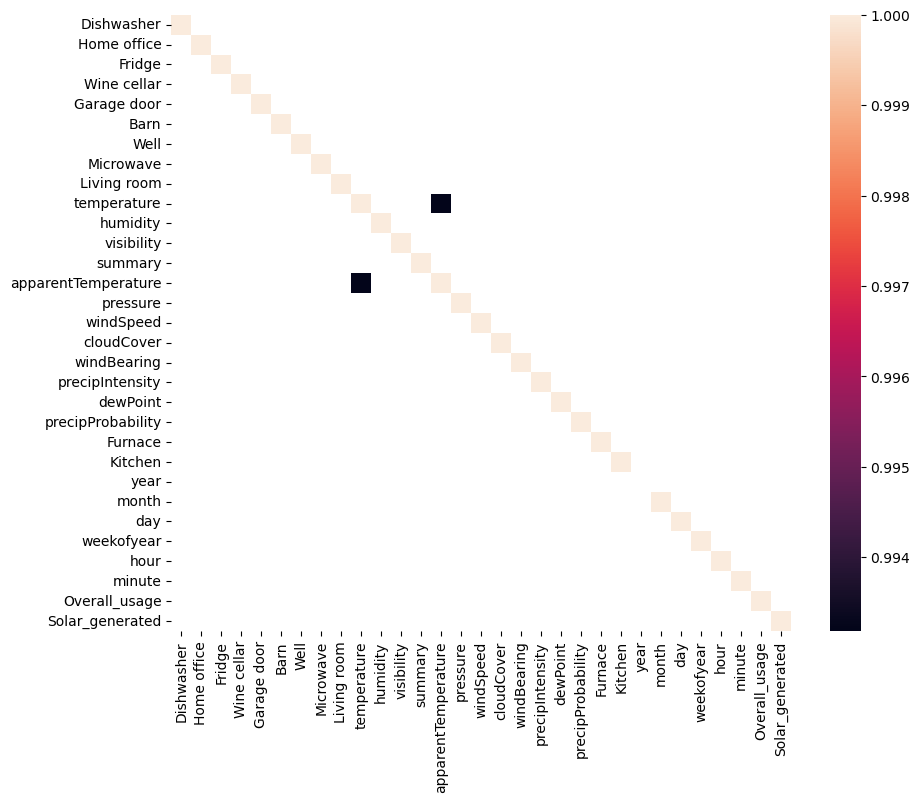

In [42]:
corr = df.corr()
fig = plt.subplots(figsize=(10, 8)) 
sns.heatmap(corr[corr>0.95])
plt.show()

In [43]:
corr

Dishwasher  Home office    Fridge  Wine cellar  \
Dishwasher             1.000000     0.065525  0.034020    -0.004619   
Home office            0.065525     1.000000  0.035013     0.003896   
Fridge                 0.034020     0.035013  1.000000     0.076183   
Wine cellar           -0.004619     0.003896  0.076183     1.000000   
Garage door           -0.008958    -0.013537 -0.002380     0.004393   
Barn                   0.006914    -0.038479 -0.002205     0.006372   
Well                   0.008316    -0.006467  0.010579     0.006686   
Microwave             -0.001197    -0.007923  0.025698     0.013267   
Living room            0.000612    -0.052402  0.054008     0.033997   
temperature           -0.015716     0.011908  0.107466     0.289168   
humidity              -0.001868    -0.006008  0.030749     0.055541   
visibility            -0.008064     0.020638  0.009019     0.030095   
summary               -0.008243    -0.022888 -0.003940     0.005270   
apparentTemperature   -0.014547     0.010856  0.107064     0.288882   
pressure               0.000211     0.027091 -0.000517     0.018494   
windSpeed             -0.001672    -0.017898 -0.024886    -0.052860   
cloudCover            -0.002354    -0.040305 -0.023414    -0.040557   
windBearing            0.004016     0.012427 -0.008589    -0.025930   
precipIntensity        0.006265    -0.029890  0.014253     0.016588   
dewPoint              -0.016099     0.007594  0.115169     0.298207   
precipProbability      0.008189    -0.032861  0.004794     0.006571   
Furnace               -0.004197    -0.017735 -0.047486    -0.093372   
Kitchen                0.003272     0.007517  0.011322     0.005218   
year                        NaN          NaN       NaN          NaN   
month                 -0.003923     0.031268  0.048400     0.134409   
day                   -0.013282    -0.022400  0.000145     0.027662   
weekofyear            -0.000919     0.036426  0.048954     0.125140   
hour                  -0.015590    -0.196688 -0.023261     0.076454   
minute                 0.001156     0.000381  0.002344     0.000860   
Overall_usage          0.196272     0.147520  0.149223     0.124506   
Solar_generated        0.038204    -0.085421 -0.002862     0.062430   

                     Garage door      Barn      Well  Microwave  Living room  \
Dishwasher             -0.008958  0.006914  0.008316  -0.001197     0.000612   
Home office            -0.013537 -0.038479 -0.006467  -0.007923    -0.052402   
Fridge                 -0.002380 -0.002205  0.010579   0.025698     0.054008   
Wine cellar             0.004393  0.006372  0.006686   0.013267     0.033997   
Garage door             1.000000  0.017447  0.005698  -0.002093     0.004466   
Barn                    0.017447  1.000000  0.002568   0.002386    -0.007774   
Well                    0.005698  0.002568  1.000000   0.005573     0.078899   
Microwave              -0.002093  0.002386  0.005573   1.000000     0.096468   
Living room             0.004466 -0.007774  0.078899   0.096468     1.000000   
temperature             0.013511 -0.017188 -0.004691   0.001369    -0.049781   
humidity               -0.007399 -0.002141 -0.006590   0.012541     0.003189   
visibility              0.002262  0.008376 -0.001069  -0.018359    -0.014494   
summary                -0.009493 -0.012608 -0.005447   0.010849    -0.021256   
apparentTemperature     0.013578 -0.015189 -0.004741   0.002265    -0.048981   
pressure               -0.000276  0.011716  0.002994  -0.001248     0.013774   
windSpeed               0.000419 -0.015196  0.000677  -0.006129    -0.013427   
cloudCover             -0.007440 -0.011614 -0.003003   0.009553    -0.009315   
windBearing             0.012327  0.006255  0.004085  -0.006218     0.016713   
precipIntensity        -0.006941 -0.007258 -0.004377   0.026936    -0.007506   
dewPoint                0.008350 -0.016738 -0.007346   0.006286    -0.044865   
precipProbability      -0.006639 -0.006063 -0.002788   0.016222    -

In [44]:
df.drop(['apparentTemperature'], axis=1, inplace=True)

In [45]:
df.columns

Index(['time', 'Dishwasher', 'Home office', 'Fridge', 'Wine cellar',
       'Garage door', 'Barn', 'Well', 'Microwave', 'Living room',
       'temperature', 'humidity', 'visibility', 'summary', 'pressure',
       'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint',
       'precipProbability', 'Furnace', 'Kitchen', 'year', 'month', 'day',
       'weekday', 'weekofyear', 'hour', 'minute', 'timing', 'Overall_usage',
       'Solar_generated'],
      dtype='object')

In [46]:
pd.set_option('display.max_columns', None)
df.head(15)

time  Dishwasher  Home office    Fridge  Wine cellar  \
0  2016-01-01 05:00:00    0.000033     0.442633  0.124150     0.006983   
1  2016-01-01 05:01:00    0.000000     0.444067  0.124000     0.006983   
2  2016-01-01 05:02:00    0.000017     0.446067  0.123533     0.006983   
3  2016-01-01 05:03:00    0.000017     0.446583  0.123133     0.006983   
4  2016-01-01 05:04:00    0.000133     0.446533  0.122850     0.006850   
5  2016-01-01 05:05:00    0.000283     0.447033  0.122300     0.006717   
6  2016-01-01 05:06:00    0.000283     0.443267  0.122050     0.006733   
7  2016-01-01 05:07:00    0.000250     0.444283  0.121800     0.006783   
8  2016-01-01 05:08:00    0.000183     0.441467  0.121617     0.006950   
9  2016-01-01 05:09:00    0.000017     0.438733  0.121633     0.007233   
10 2016-01-01 05:10:00    0.000050     0.440200  0.121450     0.007433   
11 2016-01-01 05:11:00    0.000033     0.436950  0.121250     0.007317   
12 2016-01-01 05:12:00    0.000050     0.439950  0.121033     0.007233   
13 2016-01-01 05:13:00    0.000000     0.444783  0.035017     0.007033   
14 2016-01-01 05:14:00    0.000017     0.443833  0.004783     0.006967   

    Garage door      Barn      Well  Microwave  Living room  temperature  \
0      0.013083  0.031350  0.001017   0.004067     0.001517        36.14   
1      0.013117  0.031500  0.001017   0.004067     0.001650        36.14   
2      0.013083  0.031517  0.001000   0.004067     0.001650        36.14   
3      0.013000  0.031500  0.001017   0.004067     0.001617        36.14   
4      0.012783  0.031500  0.001017   0.004067     0.001583        36.14   
5      0.012433  0.031450  0.001017   0.004067     0.001583        36.14   
6      0.012417  0.031550  0.001033   0.004117     0.001533        36.14   
7      0.012550  0.031733  0.001033   0.004200     0.001550        36.14   
8      0.012717  0.031767  0.001017   0.004200     0.001567        36.14   
9      0.013350  0.031667  0.001017   0.004200     0.001617        36.14   
10     0.013583  0.031667  0.001000   0.004200     0.001567        36.14   
11     0.013533  0.031750  0.001000   0.004200     0.001567        36.14   
12     0.013517  0.031783  0.001000   0.004217     0.001583        36.14   
13     0.013183  0.031783  0.001017   0.004217     0.001617        36.14   
14     0.013117  0.031750  0.001017   0.004233     0.001550        36.14   

    humidity  visibility  summary  pressure  windSpeed  cloudCover  \
0       0.62        10.0        3   1016.91       9.18        0.12   
1       0.62        10.0        3   1016.91       9.18        0.12   
2       0.62        10.0        3   1016.91       9.18        0.12   
3       0.62        10.0        3   1016.91       9.18        0.12   
4       0.62        10.0        3   1016.91       9.18        0.12   
5       0.62        10.0        3   1016.91       9.18        0.12   
6       0.62        10.0        3   1016.91       9.18        0.12   
7       0.62        10.0        3   1016.91       9.18        0.12   
8       0.62        10.0        3   1016.91       9.18        0.12   
9       0.62        10.0        3   1016.91       9.18        0.12   
10      0.62        10.0        3   1016.91       9.18        0.12   
11      0.62        10.0        3   1016.91       9.18        0.12   
12      0.62        10.0        3   1016.91       9.18        0.12   
13      0.62        10.0        3   1016.91       9.18        0.12   
14      0.62        10.0        3   1016.91       9.18        0.12   

    windBearing  precipIntensity  dewPoint  precipProbability   Furnace  \
0         282.0              0.0      24.4                0.0  0.082617   
1         282.0              0.0      24.4                0.0  0.084533   
2         282.0              0.0      24.4                0.0  0.083017   
3         282.0              0.0      24.4                0.0  0.175417   
4         282.0              0.0      24.4                0.0  0.300917   
5         282.0              0.0      24.4   

In [47]:
df.columns

Index(['time', 'Dishwasher', 'Home office', 'Fridge', 'Wine cellar',
       'Garage door', 'Barn', 'Well', 'Microwave', 'Living room',
       'temperature', 'humidity', 'visibility', 'summary', 'pressure',
       'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint',
       'precipProbability', 'Furnace', 'Kitchen', 'year', 'month', 'day',
       'weekday', 'weekofyear', 'hour', 'minute', 'timing', 'Overall_usage',
       'Solar_generated'],
      dtype='object')

## Checking boxplot of columns

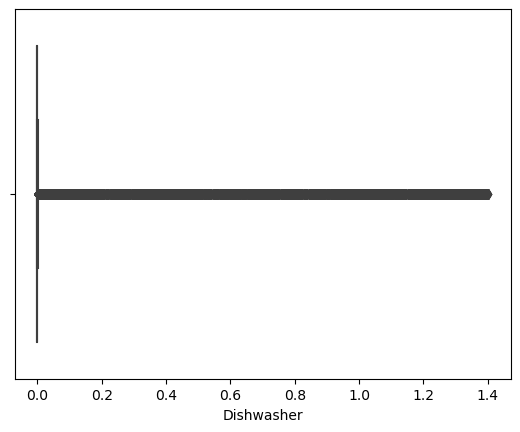

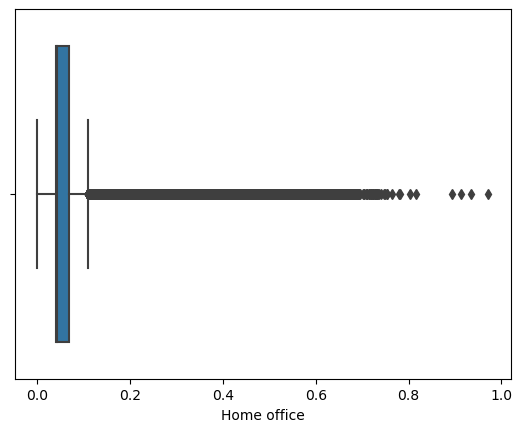

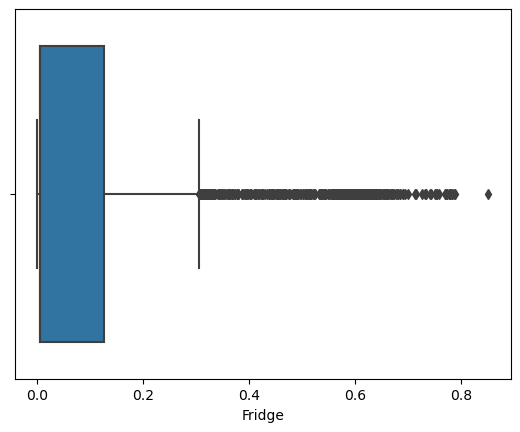

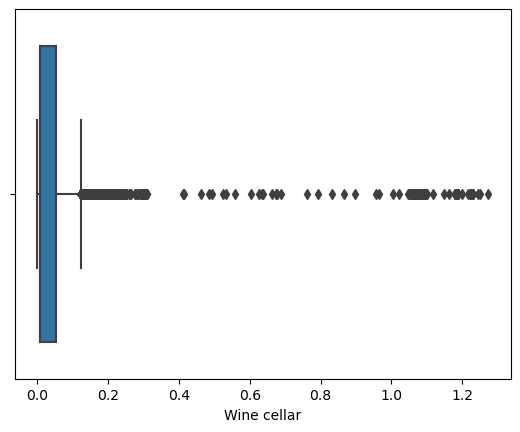

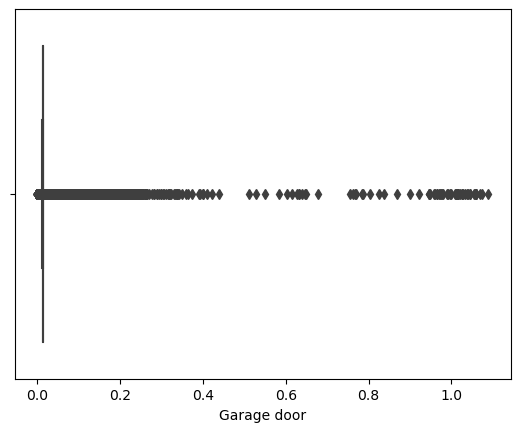

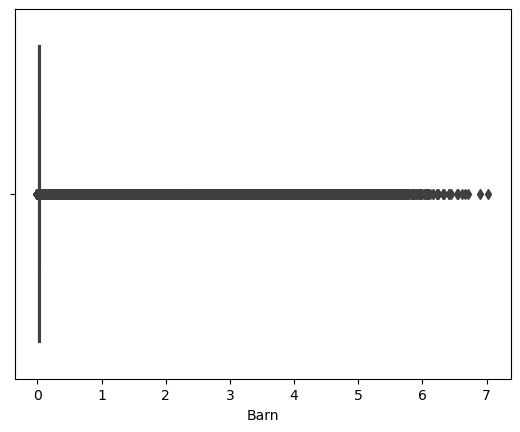

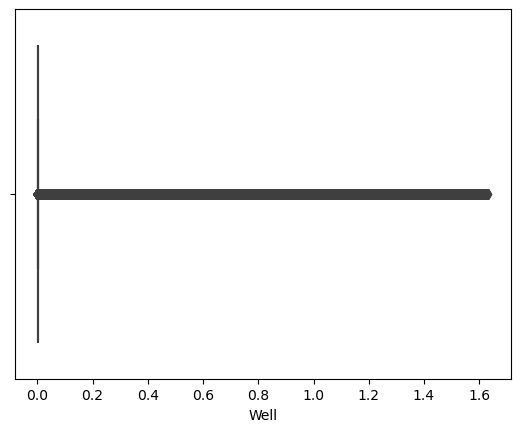

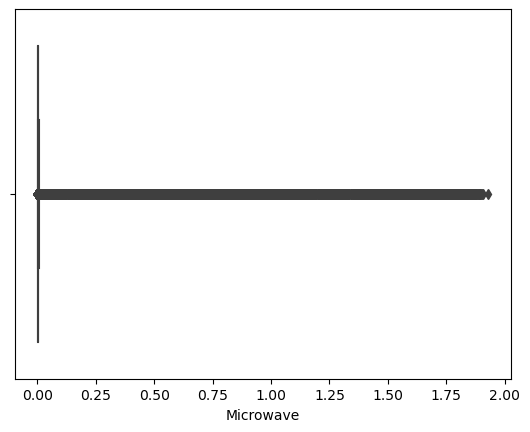

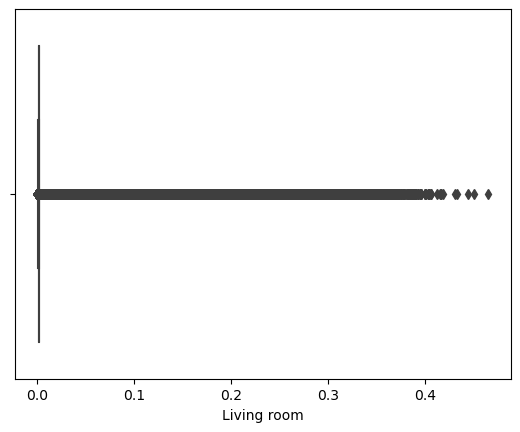

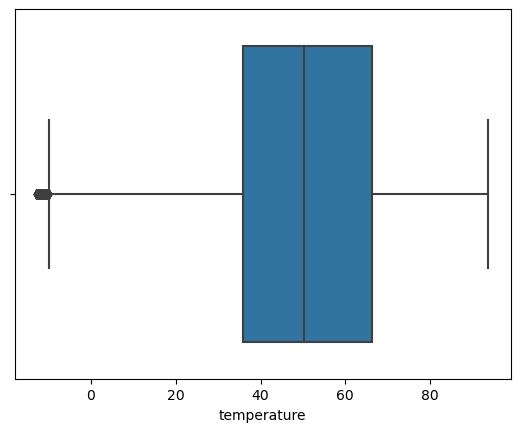

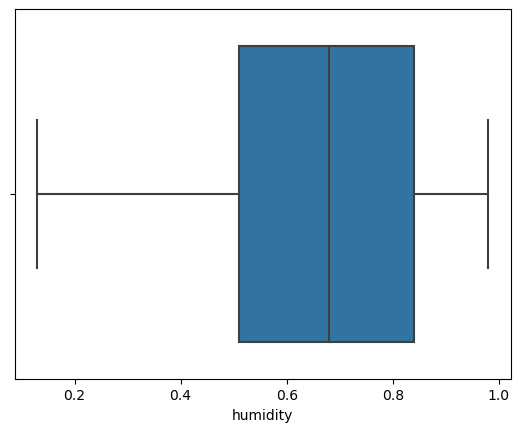

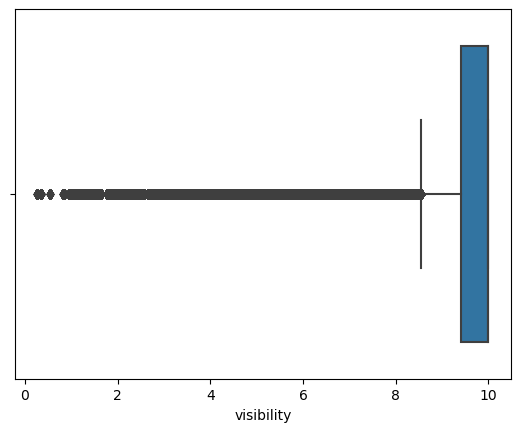

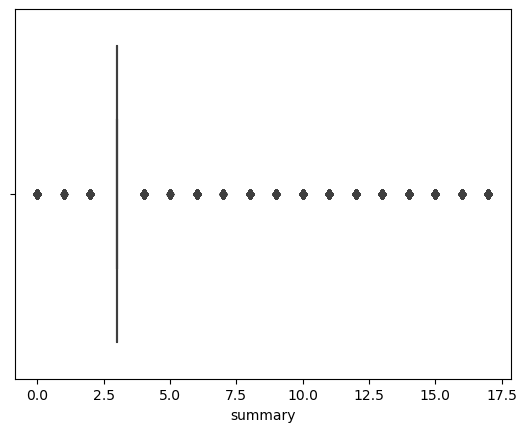

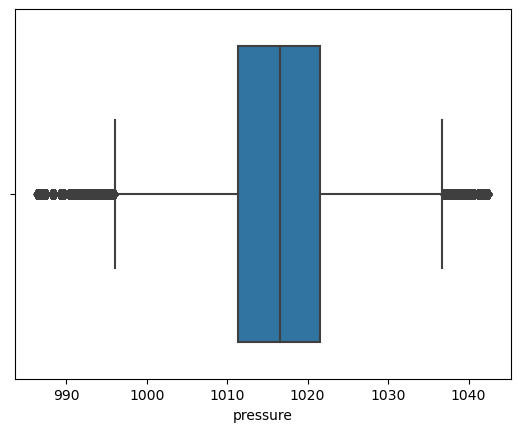

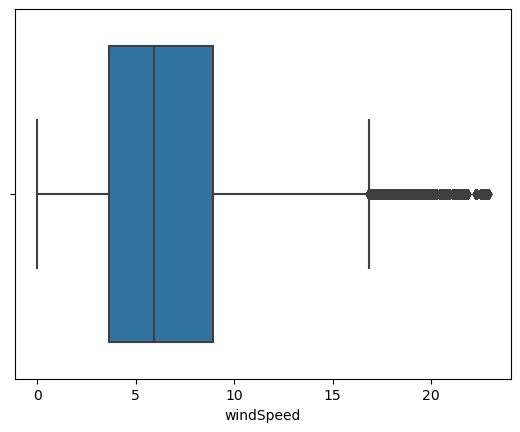

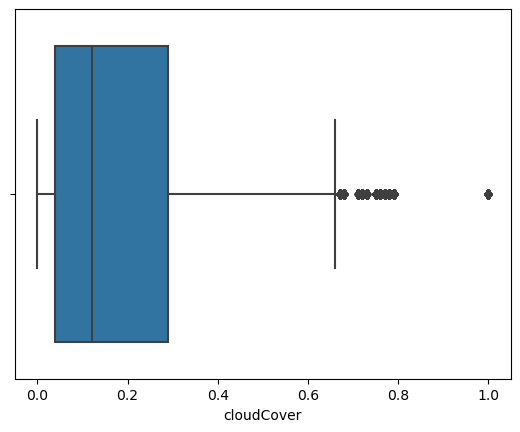

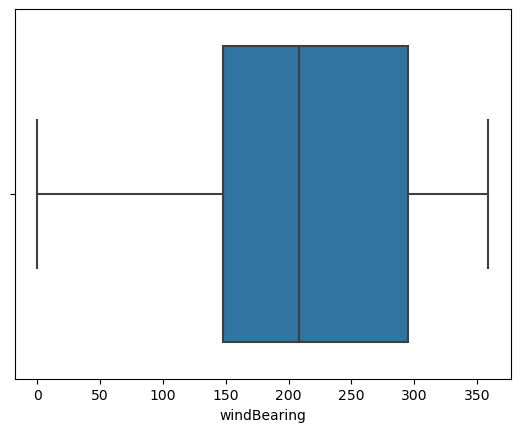

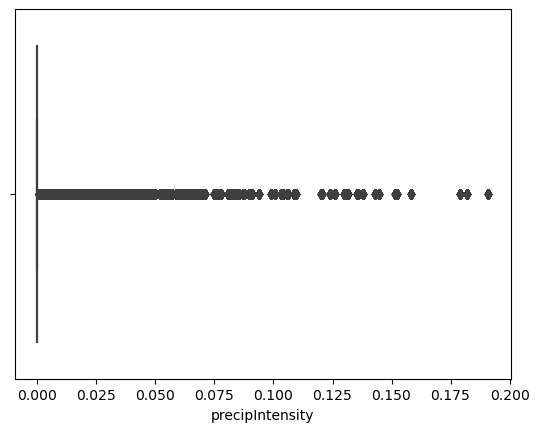

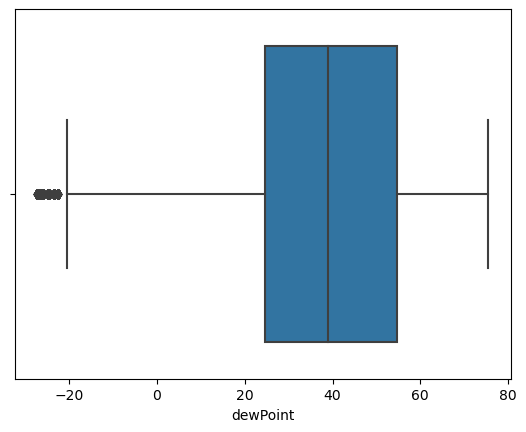

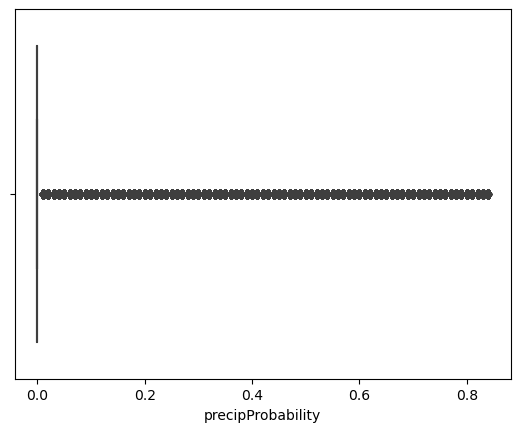

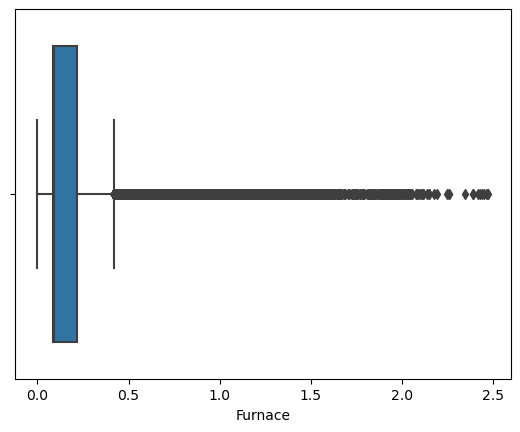

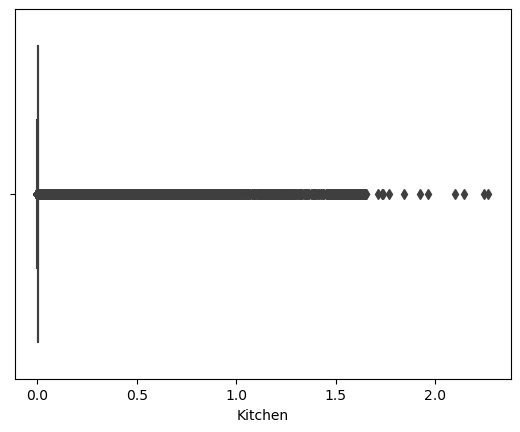

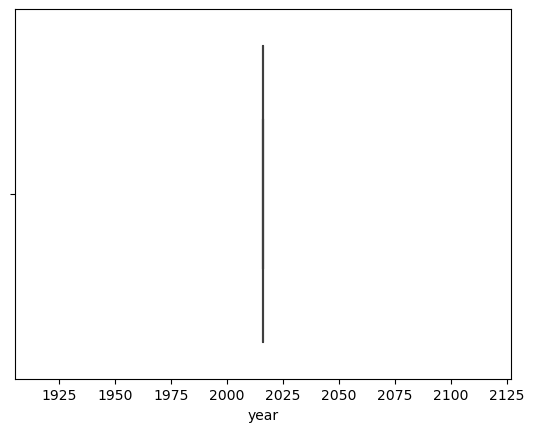

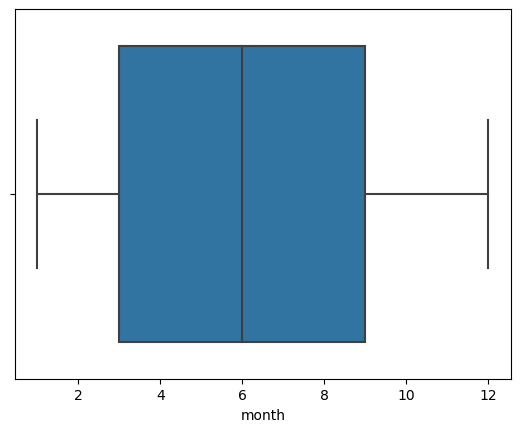

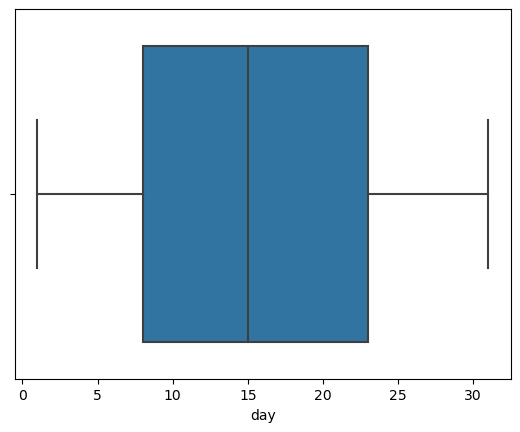

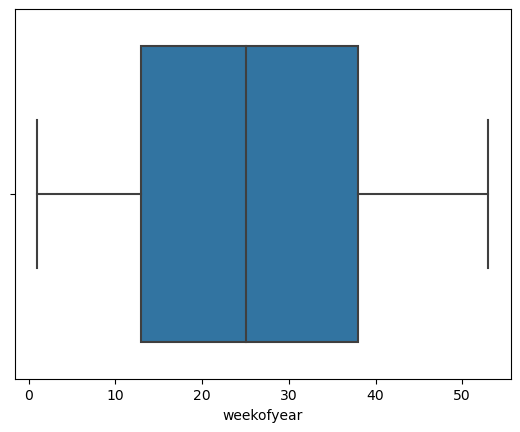

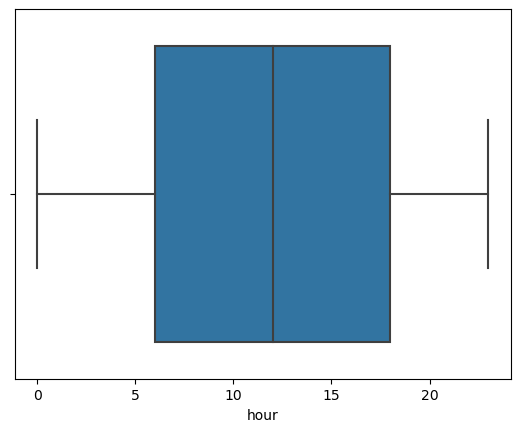

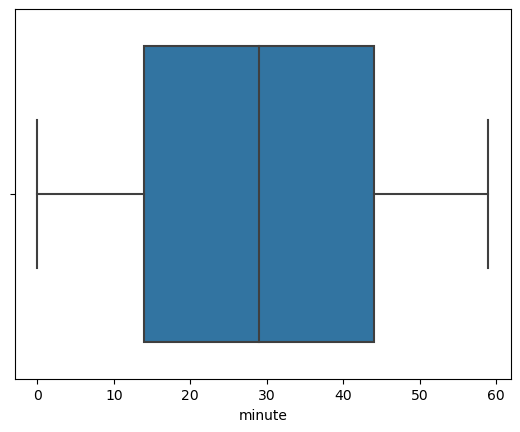

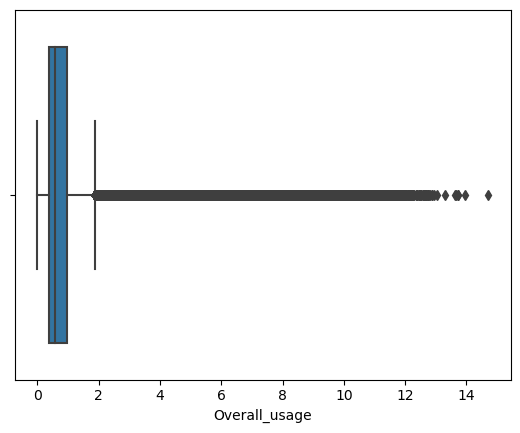

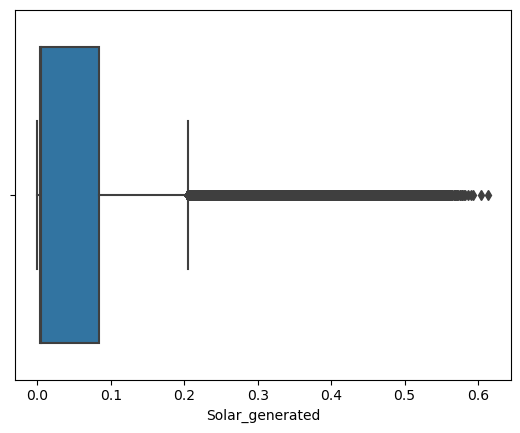

In [48]:

for i in range (1,33):
    if (i != 26 and i != 30):
        sns.boxplot(x=df[df.columns[i]])
        plt.show()

In [49]:
df.describe().T

count         mean         std          min  \
Dishwasher         503910.0     0.031368    0.190951     0.000000   
Home office        503910.0     0.081287    0.104466     0.000083   
Fridge             503910.0     0.063556    0.076199     0.000067   
Wine cellar        503910.0     0.042137    0.057967     0.000017   
Garage door        503910.0     0.014139    0.014292     0.000017   
Barn               503910.0     0.058530    0.202706     0.000000   
Well               503910.0     0.015642    0.137841     0.000000   
Microwave          503910.0     0.010983    0.098859     0.000000   
Living room        503910.0     0.035313    0.096056     0.000000   
temperature        503910.0    50.741935   19.113807   -12.640000   
humidity           503910.0     0.664085    0.194389     0.130000   
visibility         503910.0     9.253444    1.611186     0.270000   
summary            503910.0     5.201260    4.168663     0.000000   
pressure           503910.0  1016.301625    7.895185   986.400000   
windSpeed          503910.0     6.649936    3.982716     0.000000   
cloudCover         503910.0     0.225873    0.289892     0.000000   
windBearing        503910.0   202.356843  106.520474     0.000000   
precipIntensity    503910.0     0.002598    0.011257     0.000000   
dewPoint           503910.0    38.694013   19.087939   -27.240000   
precipProbability  503910.0     0.056453    0.165836     0.000000   
Furnace            503910.0     0.235989    0.273885     0.000300   
Kitchen            503910.0     0.009788    0.079883     0.000000   
year               503910.0  2016.000000    0.000000  2016.000000   
month              503910.0     6.268381    3.319007     1.000000   
day                503910.0    15.411681    8.788936     1.000000   
weekofyear         503910.0    25.519557   14.471507     1.000000   
hour               503910.0    11.501399    6.922017     0.000000   
minute             503910.0    29.499107   17.318119     0.000000   
Overall_usage      503910.0     0.858962    1.058207     0.000000   
Solar_generated    503910.0     0.076229    0.128428     0.000000   

                           25%          50%          75%          max  
Dishwasher            0.000000     0.000017     0.000233     1.401767  
Home office           0.040383     0.042217     0.068283     0.971750  
Fridge                0.005083     0.005433     0.125417     0.851267  
Wine cellar           0.007133     0.008083     0.053192     1.273933  
Garage door           0.012733     0.012933     0.013100     1.088983  
Barn                  0.029833     0.031317     0.032883     7.027900  
Well                  0.000983     0.001000     0.001017     1.633017  
Microwave             0.003617     0.004000     0.004067     1.929800  
Living room           0.001483     0.001617     0.001750     0.465217  
temperature          35.770000    50.320000    66.260000    93.720000  
humidity              0.510000     0.680000     0.840000     0.980000  
visibility            9.420000    10.000000    10.000000    10.000000  
summary               3.000000     3.000000     3.000000    17.000000  
pressure           1011.290000  1016.530000  1021.480000  1042.460000  
windSpeed             3.660000     5.930000     8.940000    22.910000  
cloudCover            0.040000     0.120000     0.290000     1.000000  
windBearing         148.000000   208.000000   295.000000   359.000000  
precipIntensity       0.000000     0.000000     0.000000     0.191000  
dewPoint             24.600000    39.030000    54.790000    75.490000  
precipProbability     0.000000     0.000000     0.000000     0.840000  
Furnace               0.085300     0.088950     0.219417     2.472633  
Kitchen               0.000600     0.000750     0.000850     2.265867  
year               2016.000000  2016.000000  2016.000000  2016.000000  
month                 3.000000     6.000000     9.000000    12.000000  
day                   8.000000    15.000000    23.000000    31.000000  
weekofyear

# Weather Data

In [50]:
weather_data=df[['time','year', 'month', 'day','weekday', 'weekofyear', 'hour', 'minute', 'timing','temperature', 'humidity', 'visibility', 'summary', 'pressure',
       'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint',
       'precipProbability']].copy()

In [51]:
weather_data

time  year  month  day weekday  weekofyear  hour  \
0      2016-01-01 05:00:00  2016      1    1  Friday          53     5   
1      2016-01-01 05:01:00  2016      1    1  Friday          53     5   
2      2016-01-01 05:02:00  2016      1    1  Friday          53     5   
3      2016-01-01 05:03:00  2016      1    1  Friday          53     5   
4      2016-01-01 05:04:00  2016      1    1  Friday          53     5   
...                    ...   ...    ...  ...     ...         ...   ...   
503905 2016-12-16 03:25:00  2016     12   16  Friday          50     3   
503906 2016-12-16 03:26:00  2016     12   16  Friday          50     3   
503907 2016-12-16 03:27:00  2016     12   16  Friday          50     3   
503908 2016-12-16 03:28:00  2016     12   16  Friday          50     3   
503909 2016-12-16 03:29:00  2016     12   16  Friday          50     3   

        minute   timing  temperature  humidity  visibility  summary  pressure  \
0            0  Morning        36.14      0.62       10.00        3   1016.91   
1            1  Morning        36.14      0.62       10.00        3   1016.91   
2            2  Morning        36.14      0.62       10.00        3   1016.91   
3            3  Morning        36.14      0.62       10.00        3   1016.91   
4            4  Morning        36.14      0.62       10.00        3   1016.91   
...        ...      ...          ...       ...         ...      ...       ...   
503905      25    Night        35.12      0.86        8.74       10   1011.49   
503906      26    Night        35.12      0.86        8.74       10   1011.49   
503907      27    Night        35.12      0.86        8.74       10   1011.49   
503908      28    Night        35.12      0.86        8.74       10   1011.49   
503909      29    Night        35.12      0.86        8.74       10   1011.49   

        windSpeed  cloudCover  windBearing  precipIntensity  dewPoint  \
0            9.18        0.12        282.0           0.0000     24.40   
1            9.18        0.12        282.0           0.0000     24.40   
2            9.18        0.12        282.0           0.0000     24.40   
3            9.18        0.12        282.0           0.0000     24.40   
4            9.18        0.12        282.0           0.0000     24.40   
...           ...         ...          ...              ...       ...   
503905       6.72        0.31        186.0           0.0101     31.27   
503906       6.72        0.31        186.0           0.0101     31.27   
503907       6.72        0.31        186.0           0.0101     31.27   
503908       6.72        0.31        186.0           0.0101     31.27   
503909       6.72        0.31        186.0           0.0101     31.27   

        precipProbability  
0                    0.00  
1                    0.00  
2                    0.00  
3                    0.00  
4                    0.00  
...                   ...  
503905               0.51  
503906               0.51  
503907               0.51  
503908               0.51  
503909               0.51  

[503910 rows x 20 columns]

# Energy Data

In [52]:
Energy_Data=df[['time','year', 'month', 'day','weekday', 'weekofyear', 'hour', 'minute', 'timing', 'Dishwasher', 'Home office', 'Fridge', 'Wine cellar',
       'Garage door', 'Barn', 'Well', 'Microwave', 'Living room','Furnace', 'Kitchen', 'Overall_usage',
       'Solar_generated']]

In [53]:
Energy_Data

time  year  month  day weekday  weekofyear  hour  \
0      2016-01-01 05:00:00  2016      1    1  Friday          53     5   
1      2016-01-01 05:01:00  2016      1    1  Friday          53     5   
2      2016-01-01 05:02:00  2016      1    1  Friday          53     5   
3      2016-01-01 05:03:00  2016      1    1  Friday          53     5   
4      2016-01-01 05:04:00  2016      1    1  Friday          53     5   
...                    ...   ...    ...  ...     ...         ...   ...   
503905 2016-12-16 03:25:00  2016     12   16  Friday          50     3   
503906 2016-12-16 03:26:00  2016     12   16  Friday          50     3   
503907 2016-12-16 03:27:00  2016     12   16  Friday          50     3   
503908 2016-12-16 03:28:00  2016     12   16  Friday          50     3   
503909 2016-12-16 03:29:00  2016     12   16  Friday          50     3   

        minute   timing  Dishwasher  Home office    Fridge  Wine cellar  \
0            0  Morning    0.000033     0.442633  0.124150     0.006983   
1            1  Morning    0.000000     0.444067  0.124000     0.006983   
2            2  Morning    0.000017     0.446067  0.123533     0.006983   
3            3  Morning    0.000017     0.446583  0.123133     0.006983   
4            4  Morning    0.000133     0.446533  0.122850     0.006850   
...        ...      ...         ...          ...       ...          ...   
503905      25    Night    0.000050     0.041783  0.005267     0.008667   
503906      26    Night    0.000050     0.041750  0.005233     0.008433   
503907      27    Night    0.000033     0.042033  0.004983     0.008467   
503908      28    Night    0.000050     0.042100  0.005333     0.008233   
503909      29    Night    0.000050     0.042100  0.004917     0.008133   

        Garage door      Barn      Well  Microwave  Living room   Furnace  \
0          0.013083  0.031350  0.001017   0.004067     0.001517  0.082617   
1          0.013117  0.031500  0.001017   0.004067     0.001650  0.084533   
2          0.013083  0.031517  0.001000   0.004067     0.001650  0.083017   
3          0.013000  0.031500  0.001017   0.004067     0.001617  0.175417   
4          0.012783  0.031500  0.001017   0.004067     0.001583  0.300917   
...             ...       ...       ...        ...          ...       ...   
503905     0.013483  0.032283  0.000983   0.003800     0.000967  0.727683   
503906     0.013433  0.032200  0.000950   0.003800     0.000933  0.729050   
503907     0.012933  0.032283  0.001000   0.003750     0.001000  1.060117   
503908     0.012817  0.032183  0.000950   0.003767     0.000950  1.116033   
503909     0.012833  0.032167  0.000950   0.003767     0.000950  1.128833   

         Kitchen  Overall_usage  Solar_generated  
0       0.000567       0.932833         0.003483  
1       0.000567       0.934333         0.003467  
2       0.000617       0.931817         0.003467  
3       0.000650       1.022050         0.003483  
4       0.000783       1.139400         0.003467  
...          ...            ...              ...  
503905  0.000633       1.601233         0.003183  
503906  0.000600       1.599333         0.003233  
503907  0.000600       1.924267         0.003217  
503908  0.000650       1.978200         0.003217  
503909  0.000650       1.990950         0.003233  

[503910 rows x 22 columns]

# Appliance Energy consumption

# By Hours of the day

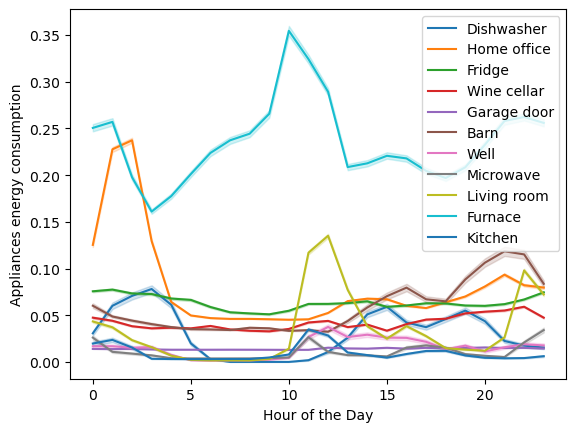

In [66]:
y_cols = ['Dishwasher', 'Home office', 'Fridge', 'Wine cellar',
       'Garage door', 'Barn', 'Well', 'Microwave', 'Living room','Furnace', 'Kitchen']

for col in y_cols:
    sns.lineplot(x='hour', y=col, data=Energy_Data, label=col)

plt.xlabel('Hour of the Day')
plt.ylabel('Appliances energy consumption')

plt.show()

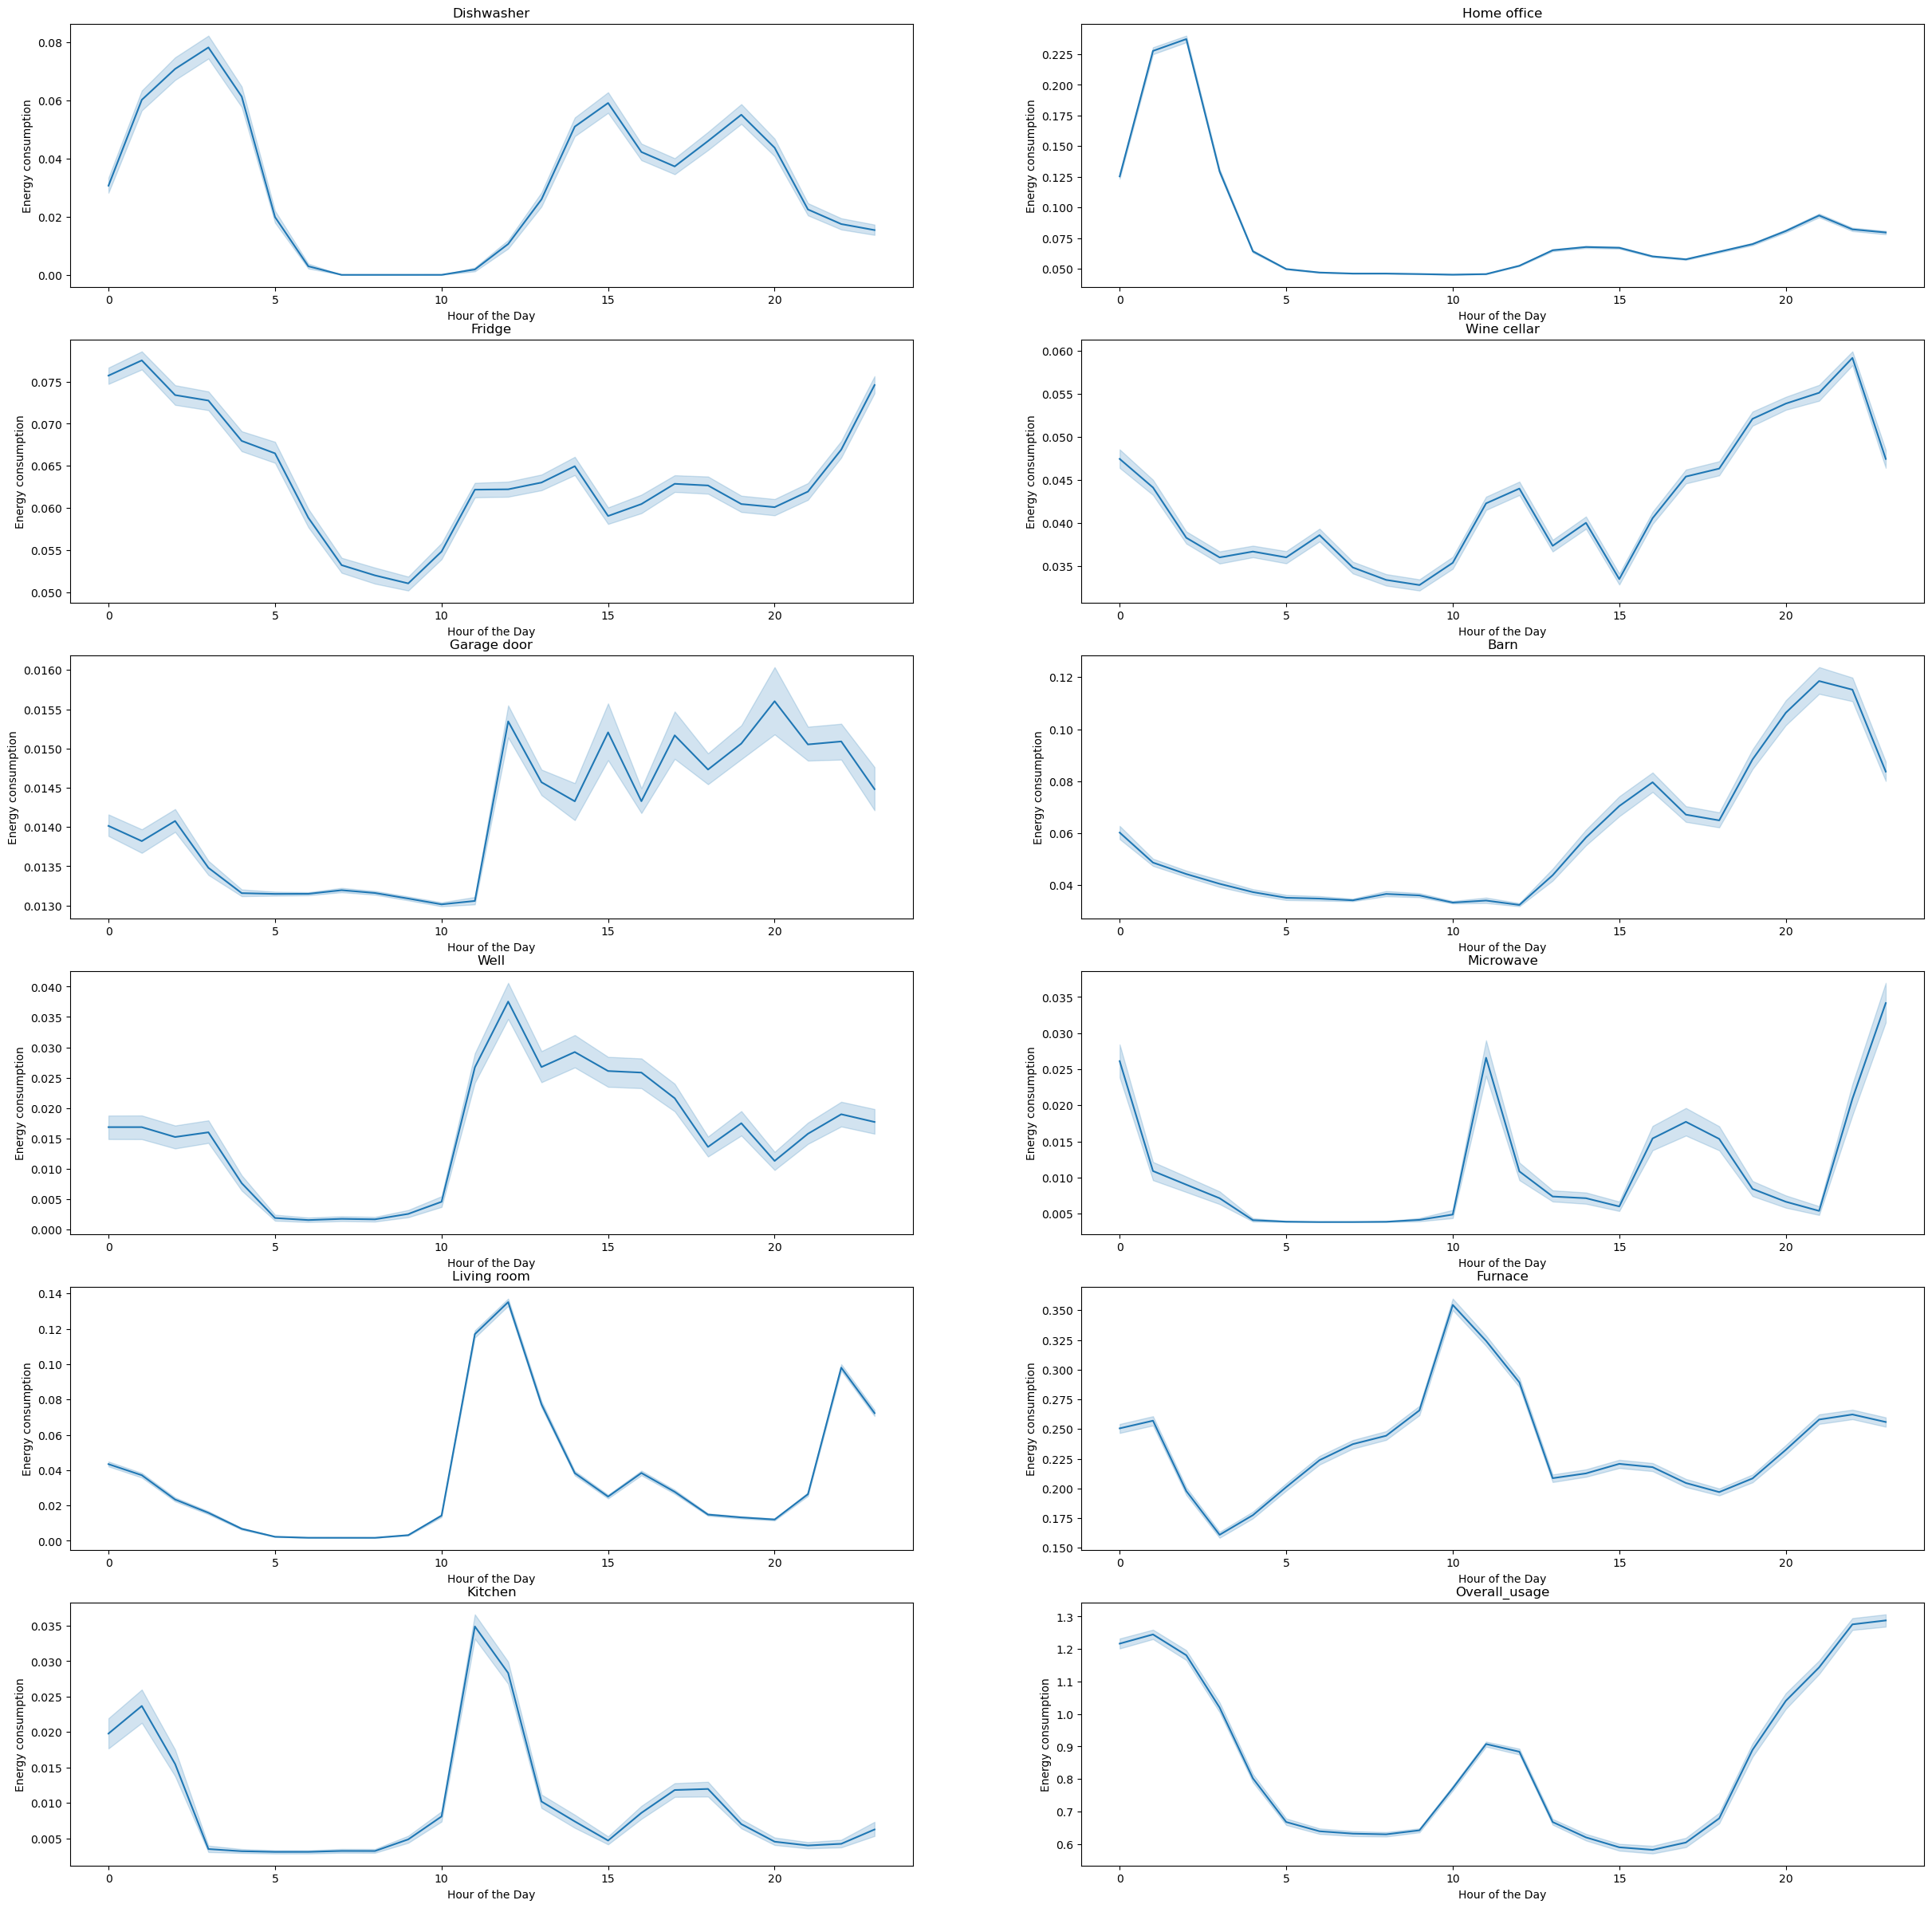

In [72]:
y_cols = ['Dishwasher', 'Home office', 'Fridge', 'Wine cellar',
       'Garage door', 'Barn', 'Well', 'Microwave', 'Living room','Furnace', 'Kitchen','Overall_usage']

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(30, 30))

for col, ax in zip(y_cols, axes.flatten()):
    sns.lineplot(x='hour', y=col, data=Energy_Data, ax=ax)
    ax.set_title(col)

for ax in axes.flatten():
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Energy consumption')

plt.show()

# By Weekday

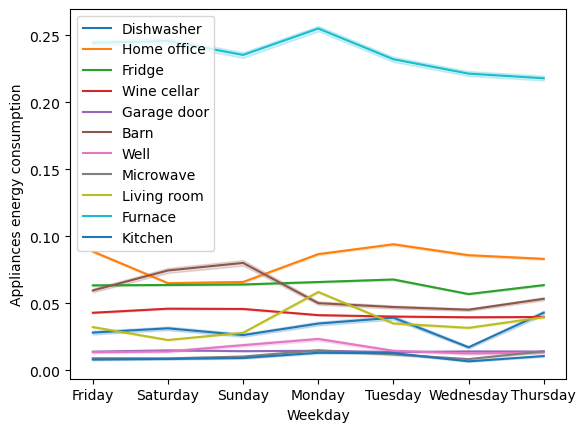

In [75]:
y_cols = ['Dishwasher', 'Home office', 'Fridge', 'Wine cellar',
       'Garage door', 'Barn', 'Well', 'Microwave', 'Living room','Furnace', 'Kitchen']

for col in y_cols:
    sns.lineplot(x='weekday', y=col, data=Energy_Data, label=col)

plt.xlabel('Weekday')
plt.ylabel('Appliances energy consumption')

plt.show()

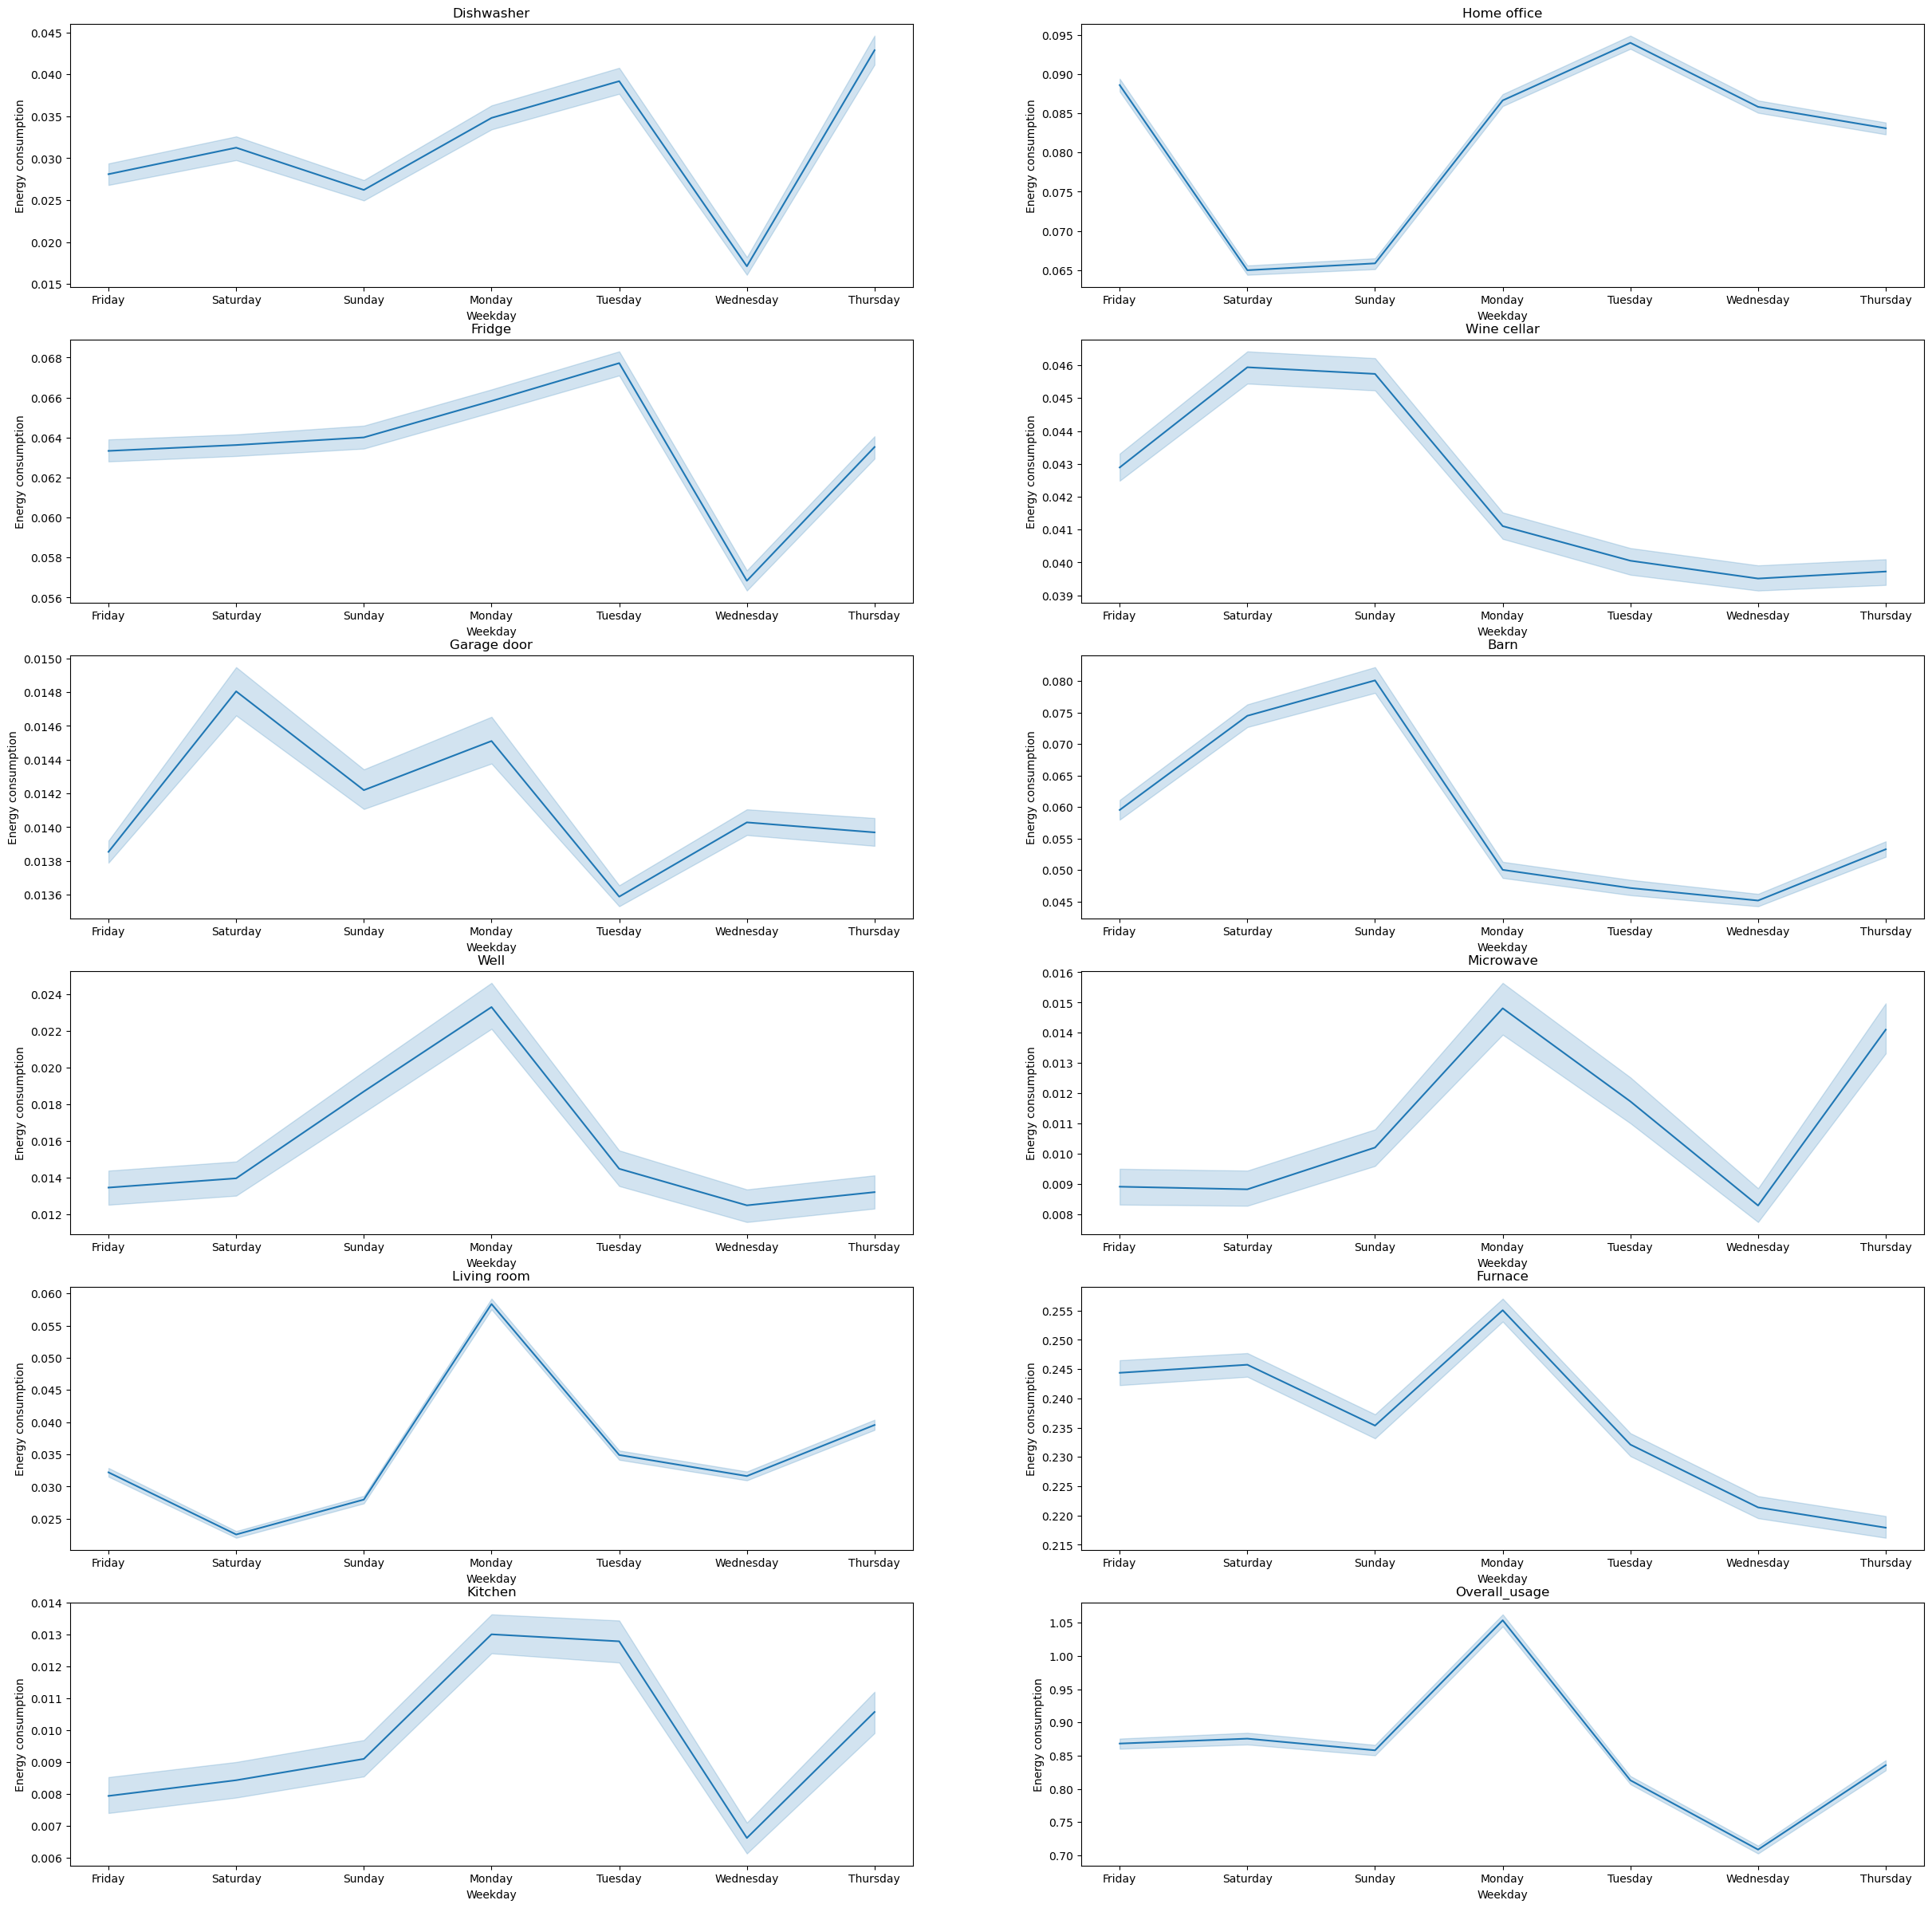

In [76]:
y_cols = ['Dishwasher', 'Home office', 'Fridge', 'Wine cellar',
       'Garage door', 'Barn', 'Well', 'Microwave', 'Living room','Furnace', 'Kitchen','Overall_usage']

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(30, 30))

for col, ax in zip(y_cols, axes.flatten()):
    sns.lineplot(x='weekday', y=col, data=Energy_Data, ax=ax)
    ax.set_title(col)

for ax in axes.flatten():
    ax.set_xlabel('Weekday')
    ax.set_ylabel('Energy consumption')

plt.show()

# By Month

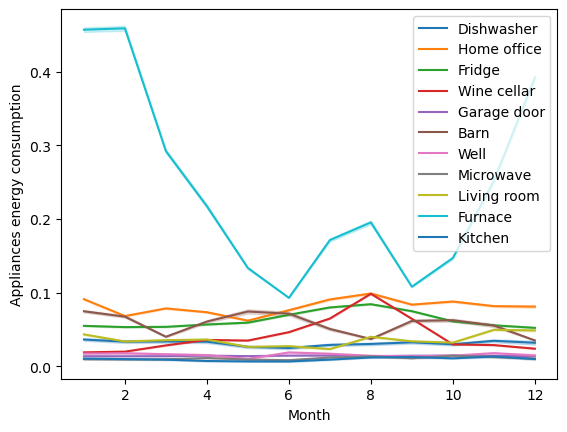

In [77]:
y_cols = ['Dishwasher', 'Home office', 'Fridge', 'Wine cellar',
       'Garage door', 'Barn', 'Well', 'Microwave', 'Living room','Furnace', 'Kitchen']

for col in y_cols:
    sns.lineplot(x='month', y=col, data=Energy_Data, label=col)

plt.xlabel('Month')
plt.ylabel('Appliances energy consumption')

plt.show()

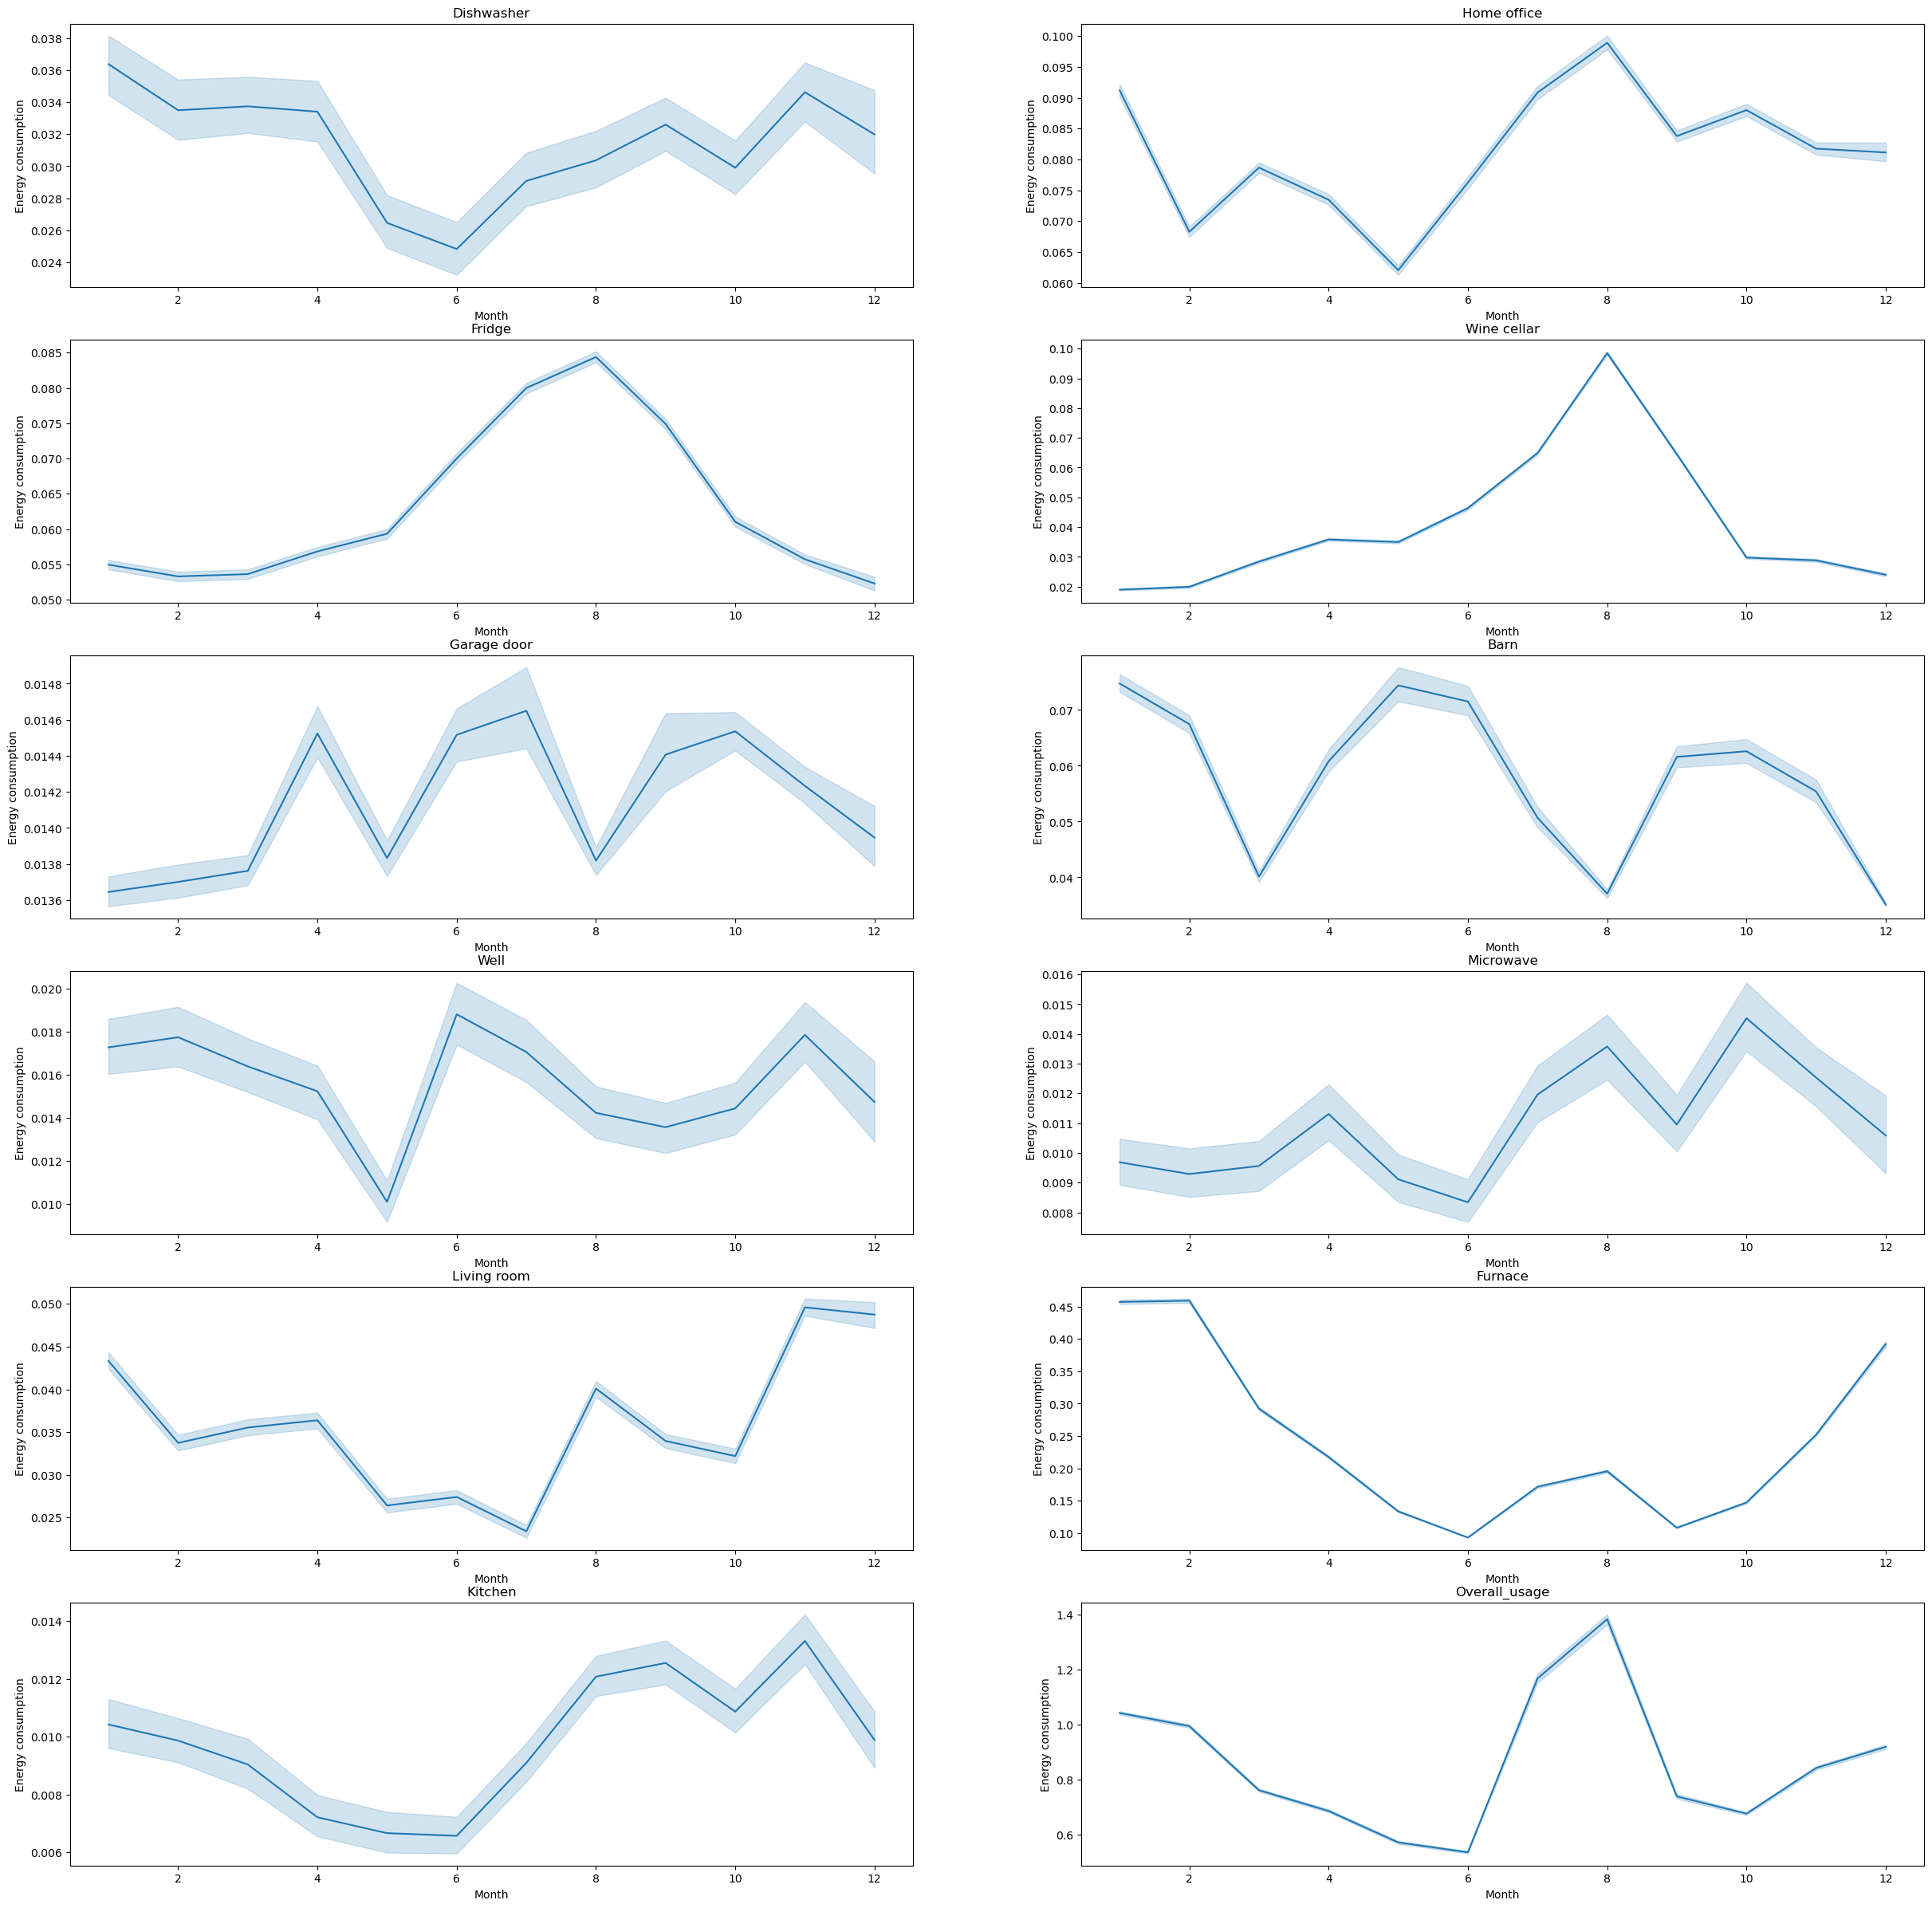

In [78]:
y_cols = ['Dishwasher', 'Home office', 'Fridge', 'Wine cellar',
       'Garage door', 'Barn', 'Well', 'Microwave', 'Living room','Furnace', 'Kitchen','Overall_usage']

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(30, 30))

for col, ax in zip(y_cols, axes.flatten()):
    sns.lineplot(x='month', y=col, data=Energy_Data, ax=ax)
    ax.set_title(col)

for ax in axes.flatten():
    ax.set_xlabel('Month')
    ax.set_ylabel('Energy consumption')

plt.show()

# Energy consumption over time

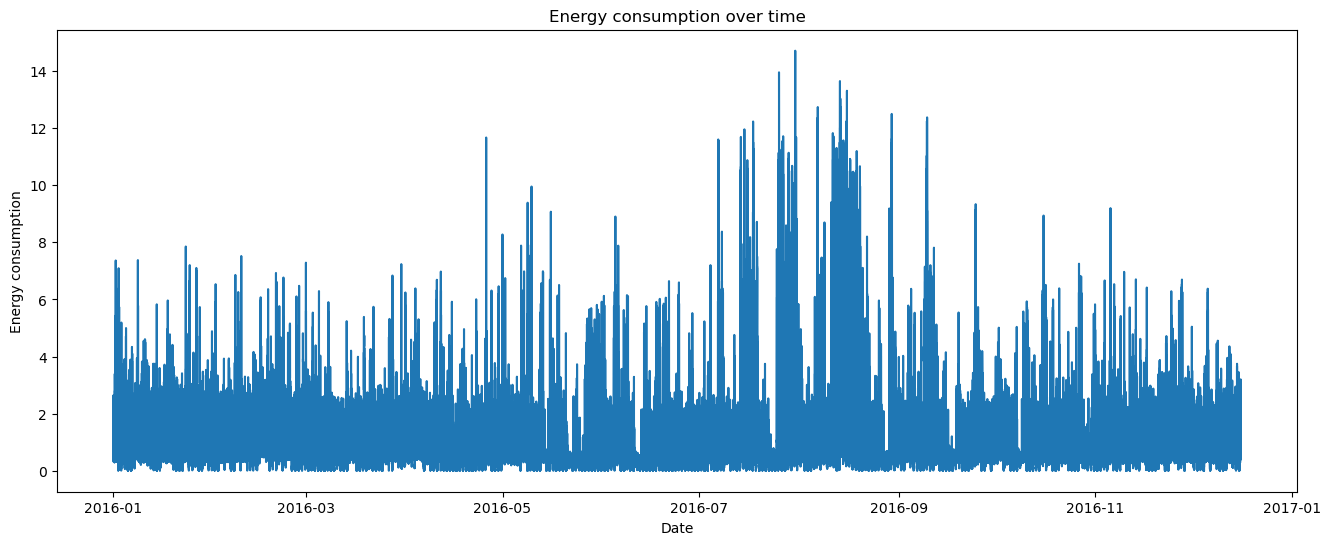

In [87]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x='time', y='Overall_usage', data=df, ax=ax)
ax.set_title('Energy consumption over time')
ax.set_xlabel('Date')
ax.set_ylabel('Energy consumption')
plt.show()

# Energy consumption by hour of the day

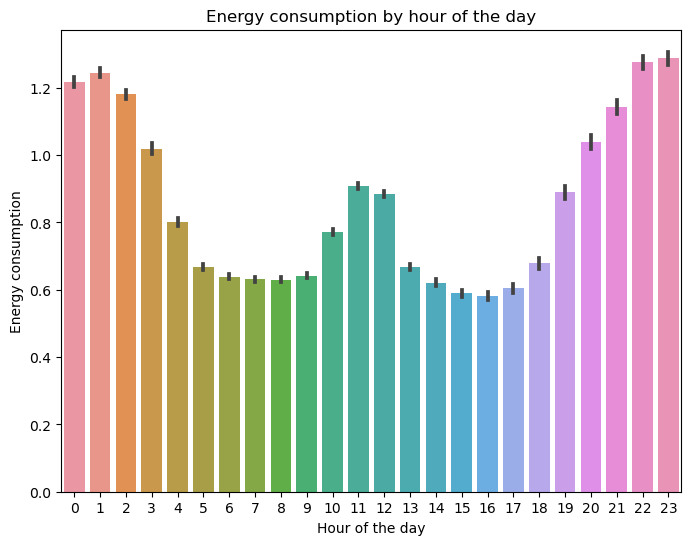

In [89]:
# Plot energy consumption by hour of the day
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='hour', y='Overall_usage', data=df, ax=ax)
ax.set_title('Energy consumption by hour of the day')
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Energy consumption')
plt.show()

# Energy consumption by day of the week

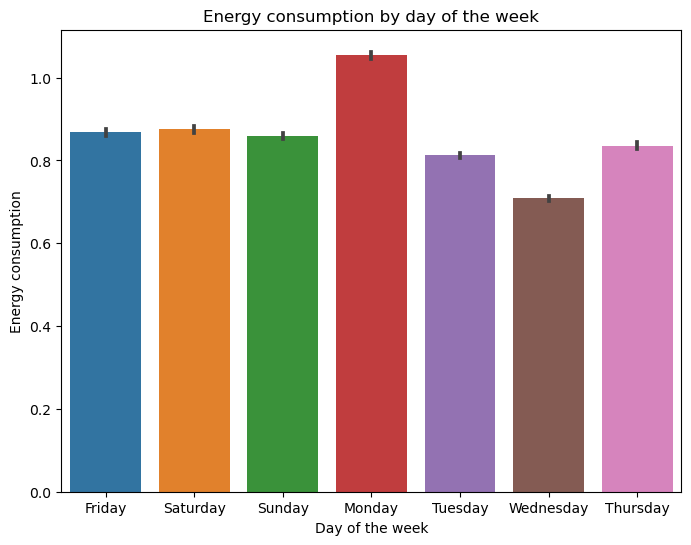

In [90]:
# Plot energy consumption by day of the week
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='weekday', y='Overall_usage', data=df, ax=ax)
ax.set_title('Energy consumption by day of the week')
ax.set_xlabel('Day of the week')
ax.set_ylabel('Energy consumption')
plt.show()


# Total Energy Generation over time

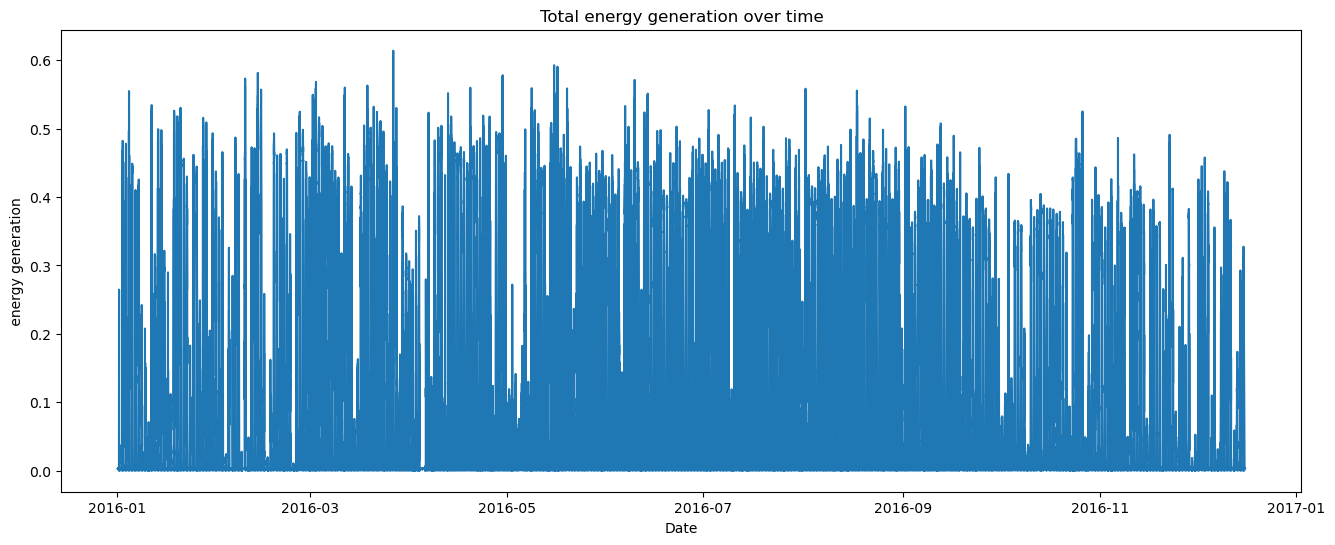

In [93]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x='time', y='Solar_generated', data=df, ax=ax)
ax.set_title('Total energy generation over time')
ax.set_xlabel('Date')
ax.set_ylabel(' energy generation ')
plt.show()

# Total Energy Generation over Hour

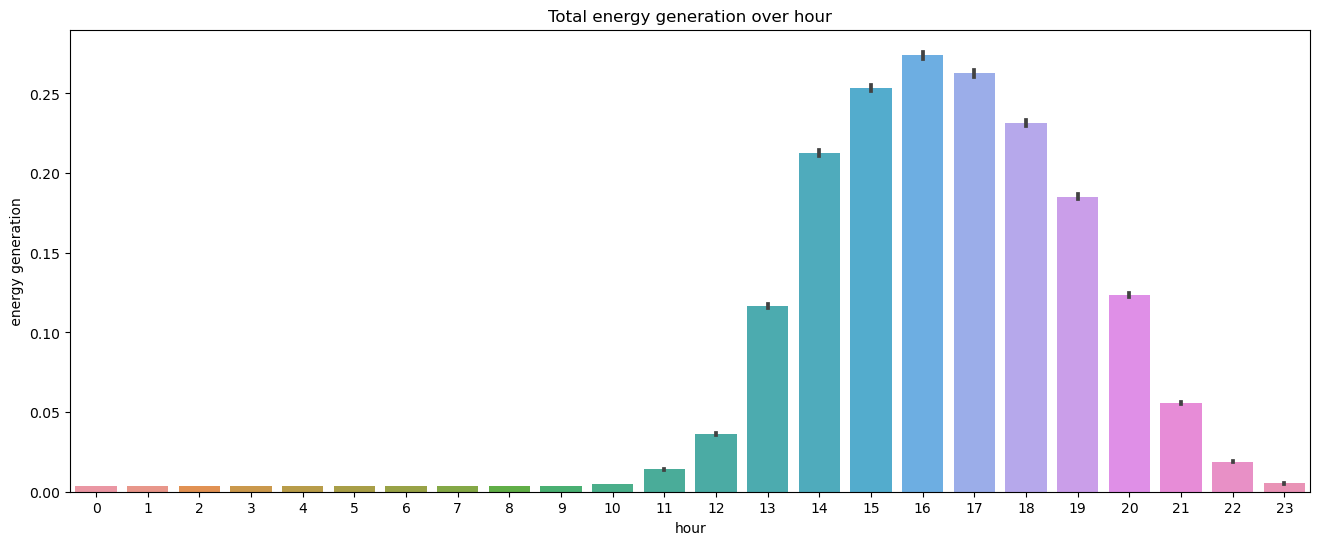

In [94]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='hour', y='Solar_generated', data=df, ax=ax)
ax.set_title('Total energy generation over hour')
ax.set_xlabel('hour')
ax.set_ylabel(' energy generation ')
plt.show()

# Weather factors vs total energy consumed

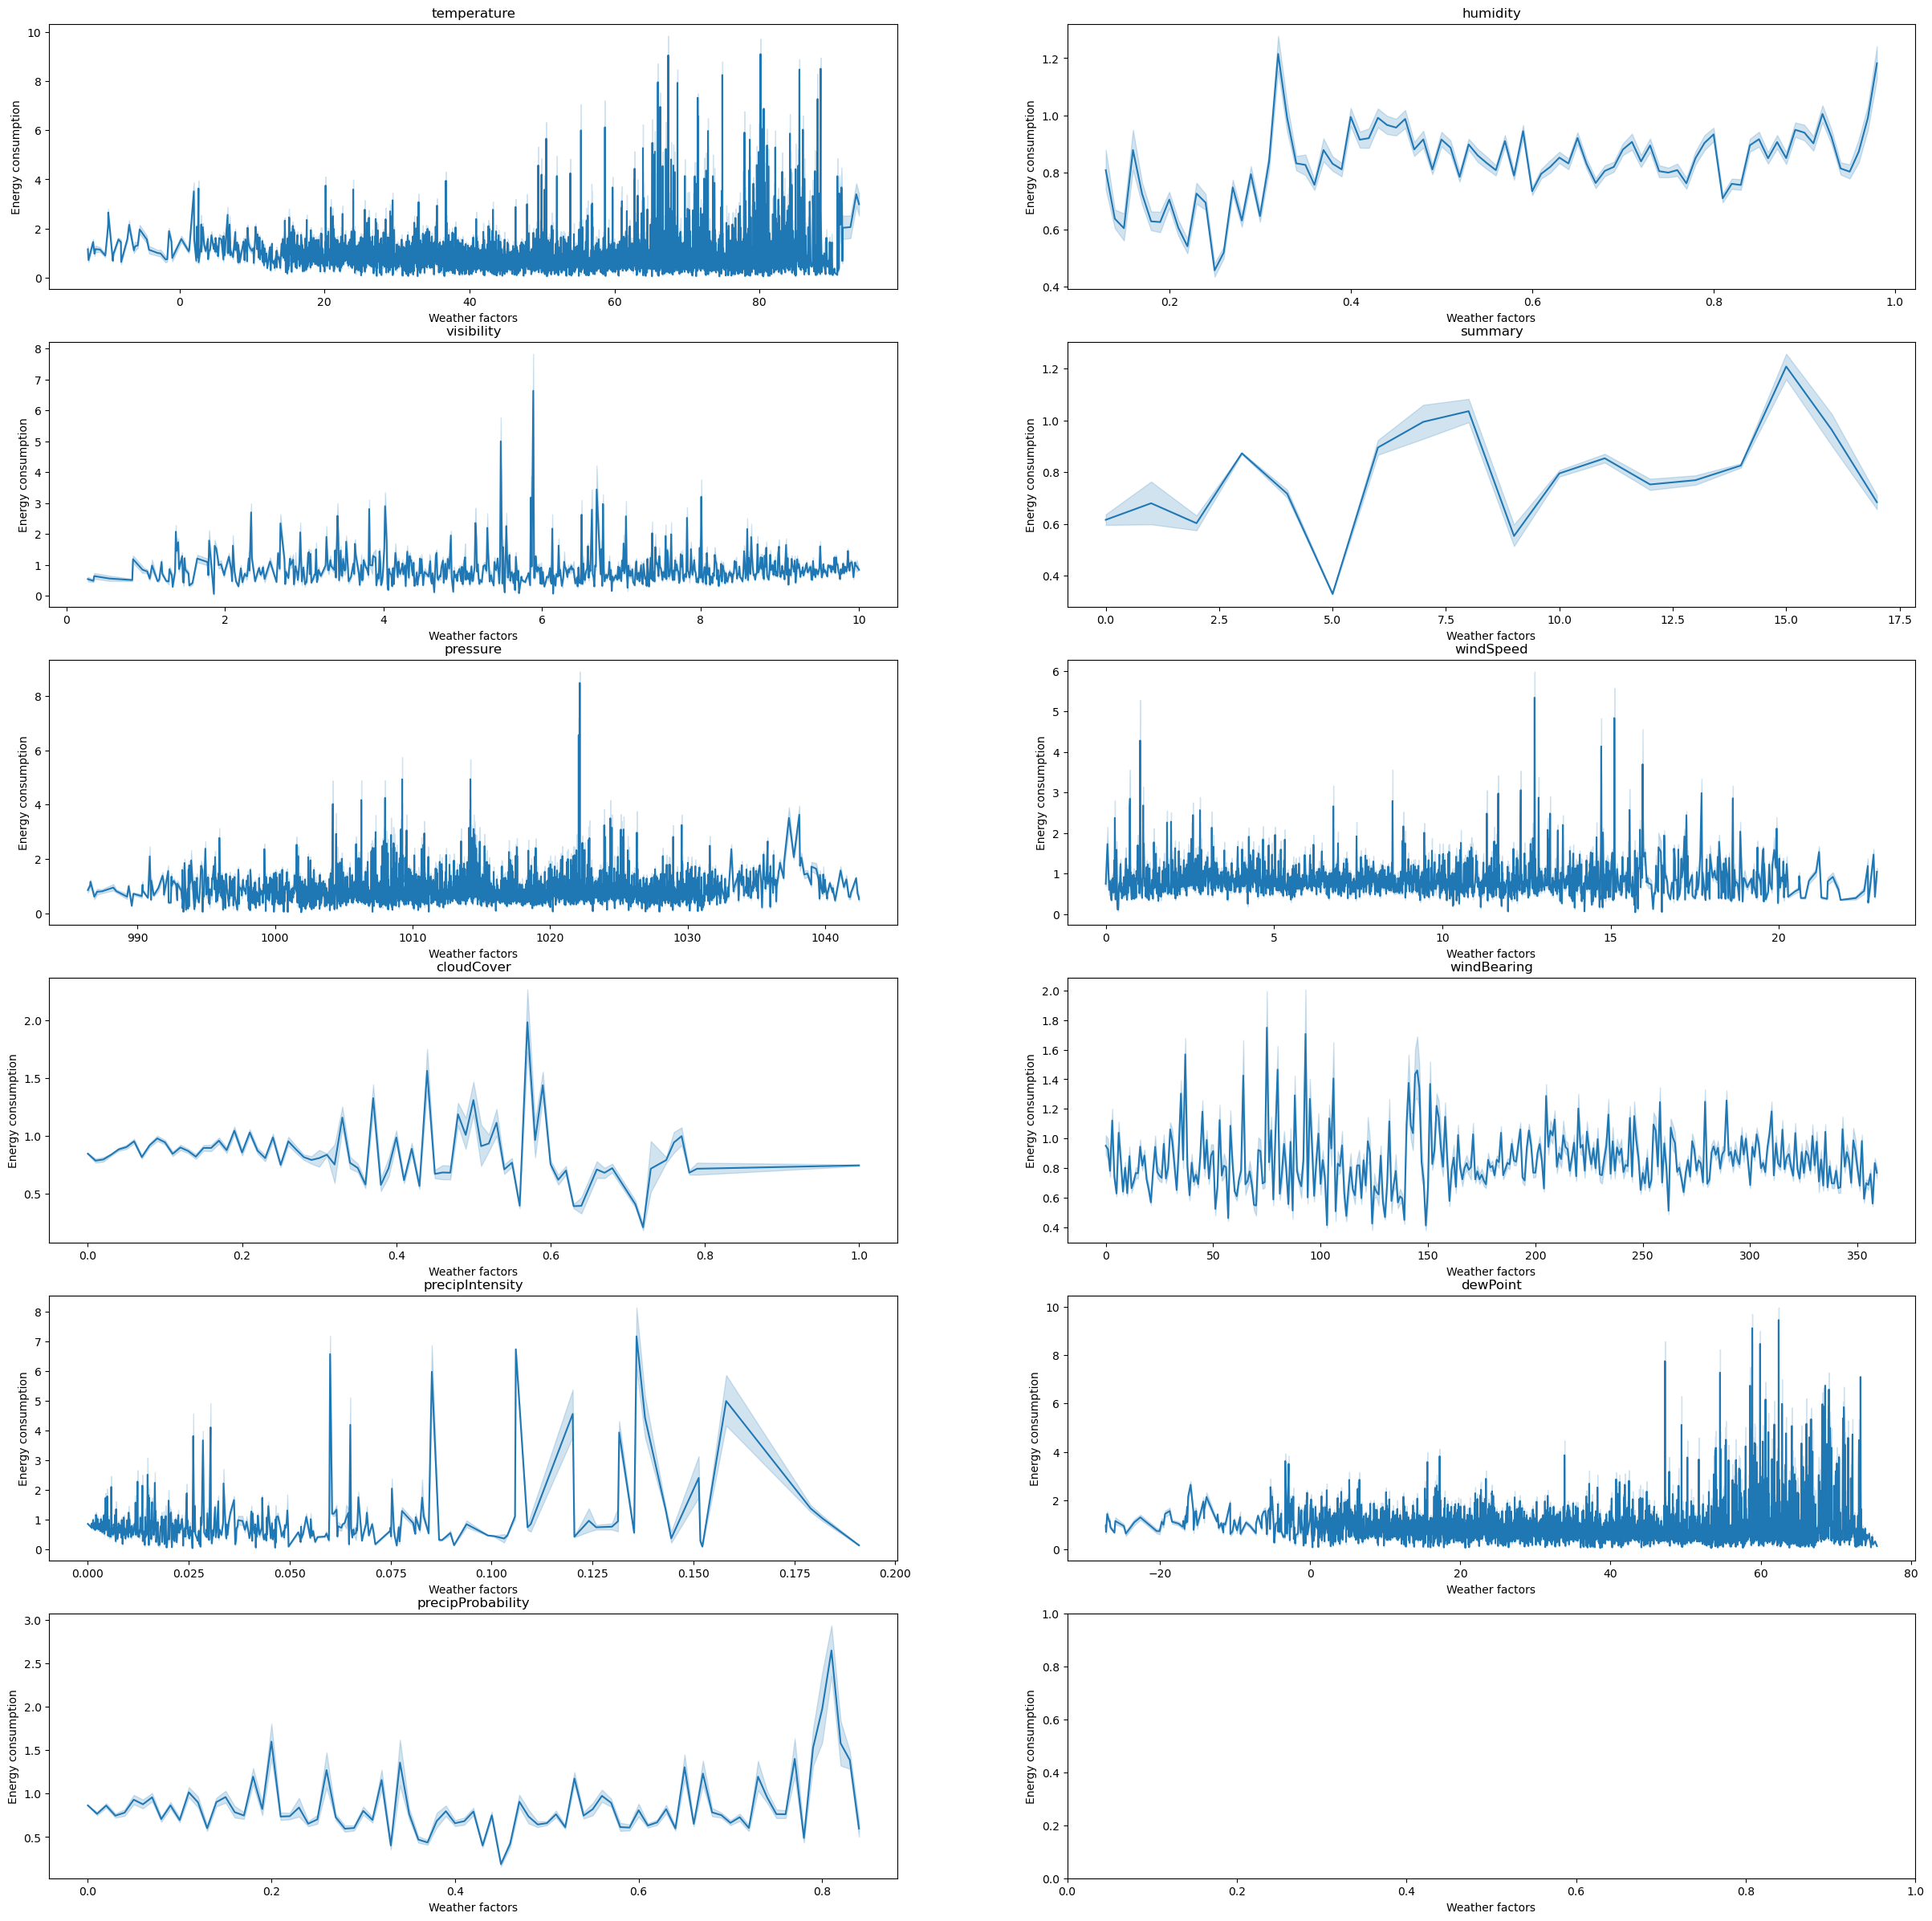

In [96]:
x_cols = ['temperature', 'humidity', 'visibility', 'summary', 'pressure',
       'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint',
       'precipProbability']

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(30, 30))

for col, ax in zip(x_cols, axes.flatten()):
    sns.lineplot(x=col, y='Overall_usage', data=df, ax=ax)
    ax.set_title(col)

for ax in axes.flatten():
    ax.set_xlabel('Weather factors')
    ax.set_ylabel('Energy consumption')

plt.show()

# Weather factors vs Energy generated

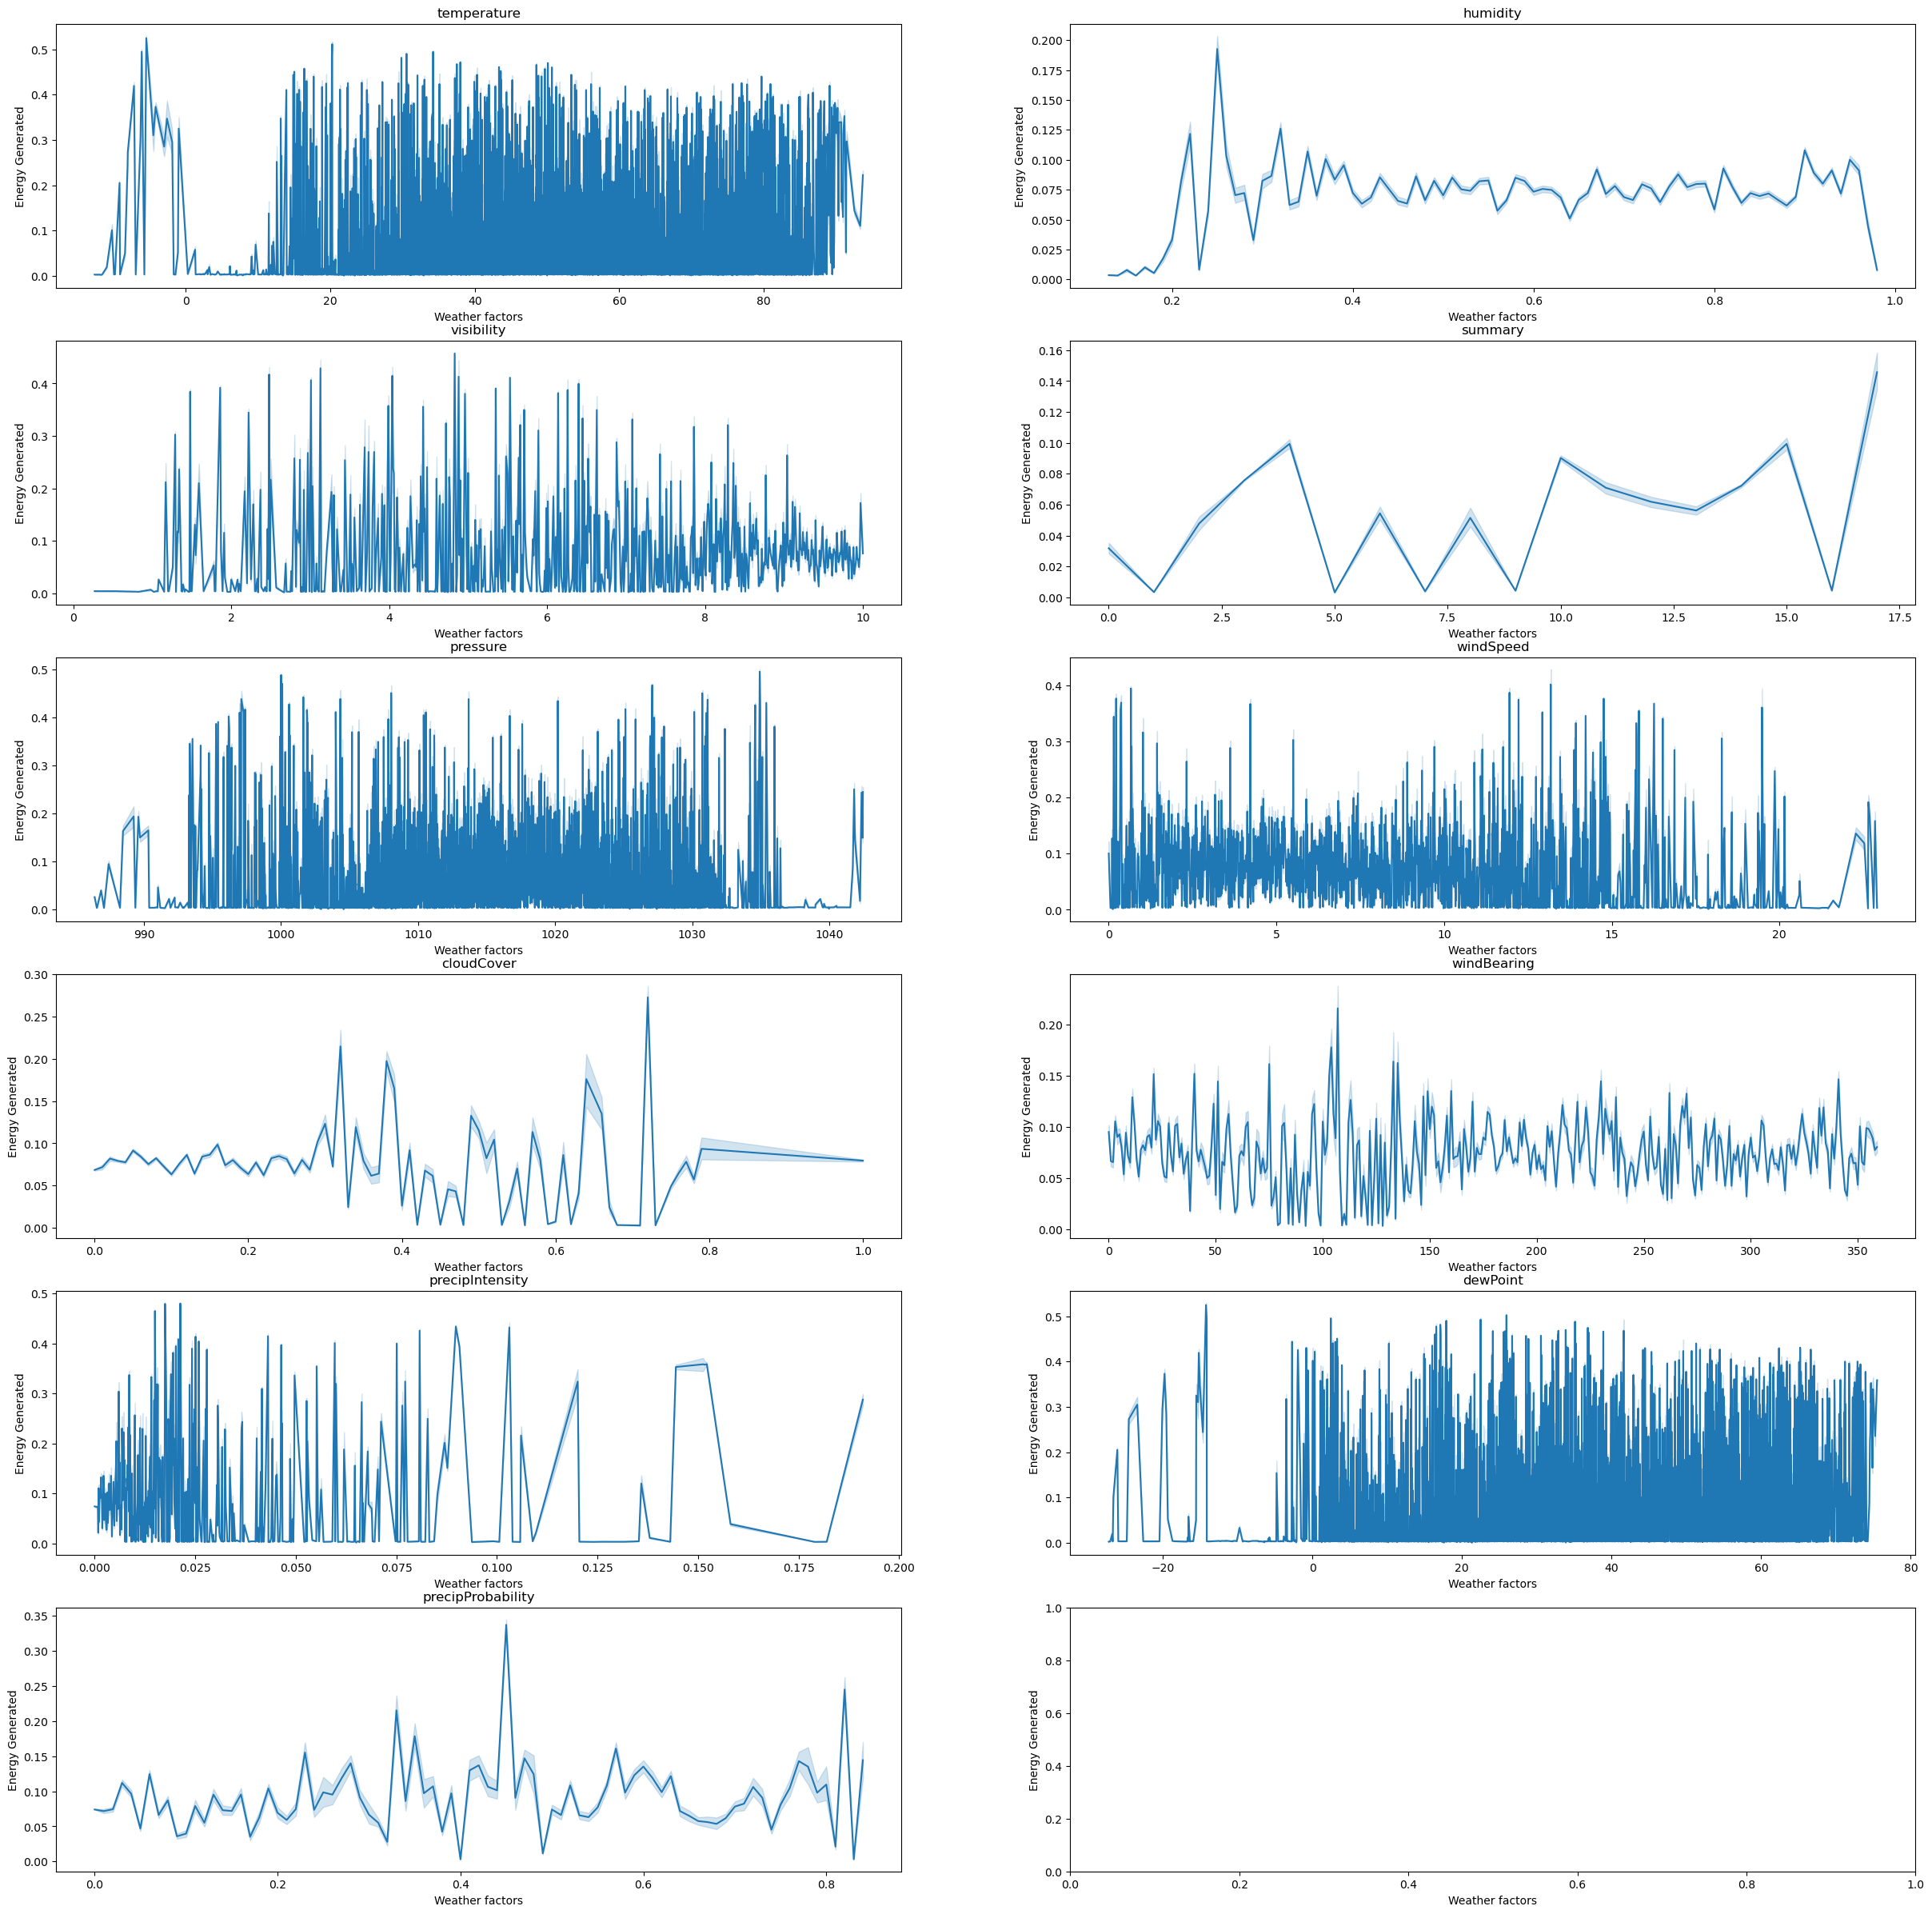

In [98]:
x_cols = ['temperature', 'humidity', 'visibility', 'summary', 'pressure',
       'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint',
       'precipProbability']

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(30, 30))

for col, ax in zip(x_cols, axes.flatten()):
    sns.lineplot(x=col, y='Solar_generated', data=df, ax=ax)
    ax.set_title(col)

for ax in axes.flatten():
    ax.set_xlabel('Weather factors')
    ax.set_ylabel('Energy Generated')

plt.show()

# 0nehot encoding

In [47]:
df=pd.get_dummies(df)

In [48]:
df

time  Dishwasher  Home office    Fridge  Wine cellar  \
0      2016-01-01 05:00:00    0.000033     0.442633  0.124150     0.006983   
1      2016-01-01 05:01:00    0.000000     0.444067  0.124000     0.006983   
2      2016-01-01 05:02:00    0.000017     0.446067  0.123533     0.006983   
3      2016-01-01 05:03:00    0.000017     0.446583  0.123133     0.006983   
4      2016-01-01 05:04:00    0.000133     0.446533  0.122850     0.006850   
...                    ...         ...          ...       ...          ...   
503905 2016-12-16 03:25:00    0.000050     0.041783  0.005267     0.008667   
503906 2016-12-16 03:26:00    0.000050     0.041750  0.005233     0.008433   
503907 2016-12-16 03:27:00    0.000033     0.042033  0.004983     0.008467   
503908 2016-12-16 03:28:00    0.000050     0.042100  0.005333     0.008233   
503909 2016-12-16 03:29:00    0.000050     0.042100  0.004917     0.008133   

        Garage door      Barn      Well  Microwave  Living room  temperature  \
0          0.013083  0.031350  0.001017   0.004067     0.001517        36.14   
1          0.013117  0.031500  0.001017   0.004067     0.001650        36.14   
2          0.013083  0.031517  0.001000   0.004067     0.001650        36.14   
3          0.013000  0.031500  0.001017   0.004067     0.001617        36.14   
4          0.012783  0.031500  0.001017   0.004067     0.001583        36.14   
...             ...       ...       ...        ...          ...          ...   
503905     0.013483  0.032283  0.000983   0.003800     0.000967        35.12   
503906     0.013433  0.032200  0.000950   0.003800     0.000933        35.12   
503907     0.012933  0.032283  0.001000   0.003750     0.001000        35.12   
503908     0.012817  0.032183  0.000950   0.003767     0.000950        35.12   
503909     0.012833  0.032167  0.000950   0.003767     0.000950        35.12   

        humidity  visibility  summary  pressure  windSpeed  cloudCover  \
0           0.62       10.00        3   1016.91       9.18        0.12   
1           0.62       10.00        3   1016.91       9.18        0.12   
2           0.62       10.00        3   1016.91       9.18        0.12   
3           0.62       10.00        3   1016.91       9.18        0.12   
4           0.62       10.00        3   1016.91       9.18        0.12   
...          ...         ...      ...       ...        ...         ...   
503905      0.86        8.74       10   1011.49       6.72        0.31   
503906      0.86        8.74       10   1011.49       6.72        0.31   
503907      0.86        8.74       10   1011.49       6.72        0.31   
503908      0.86        8.74       10   1011.49       6.72        0.31   
503909      0.86        8.74       10   1011.49       6.72        0.31   

        windBearing  precipIntensity  dewPoint  precipProbability   Furnace  \
0             282.0           0.0000     24.40               0.00  0.082617   
1             282.0           0.0000     24.40               0.00  0.084533   
2             282.0           0.0000     24.40               0.00  0.083017   
3             282.0           0.0000     24.40               0.00  0.175417   
4             282.0           0.0000     24.40               0.00  0.300917   
...             ...              ...       ...                ...       ...   
503905        186.0           0.0101     31.27               0.51  0.727683   
503906        186.0           0.0101     31.27               0.51  0.729050   
503907        186.0           0.0101     31.27               0.51  1.060117   
503908        186.0           0.0101     31.27               0.51  1.116033   
503909        186.0           0.0101     31.27               0.51  1.128833   

         Kitchen  year  month  day  weekofyear  hour  minute  Overall_usage  \
0       0.000567  2016      1    1          53     5       0       0.932833   
1       0.000567  2016      1    1          53     5       1       0.934333   
2       0.000617  2016      1    1          53   

# Scaling

In [91]:
feature_scale = [feature for feature in df.columns if feature not in ['time']]

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
df1=pd.DataFrame(df.drop('time',axis=1))

In [61]:
df1

Dishwasher  Home office    Fridge  Wine cellar  Garage door      Barn  \
0         0.000033     0.442633  0.124150     0.006983     0.013083  0.031350   
1         0.000000     0.444067  0.124000     0.006983     0.013117  0.031500   
2         0.000017     0.446067  0.123533     0.006983     0.013083  0.031517   
3         0.000017     0.446583  0.123133     0.006983     0.013000  0.031500   
4         0.000133     0.446533  0.122850     0.006850     0.012783  0.031500   
...            ...          ...       ...          ...          ...       ...   
503905    0.000050     0.041783  0.005267     0.008667     0.013483  0.032283   
503906    0.000050     0.041750  0.005233     0.008433     0.013433  0.032200   
503907    0.000033     0.042033  0.004983     0.008467     0.012933  0.032283   
503908    0.000050     0.042100  0.005333     0.008233     0.012817  0.032183   
503909    0.000050     0.042100  0.004917     0.008133     0.012833  0.032167   

            Well  Microwave  Living room  temperature  humidity  visibility  \
0       0.001017   0.004067     0.001517        36.14      0.62       10.00   
1       0.001017   0.004067     0.001650        36.14      0.62       10.00   
2       0.001000   0.004067     0.001650        36.14      0.62       10.00   
3       0.001017   0.004067     0.001617        36.14      0.62       10.00   
4       0.001017   0.004067     0.001583        36.14      0.62       10.00   
...          ...        ...          ...          ...       ...         ...   
503905  0.000983   0.003800     0.000967        35.12      0.86        8.74   
503906  0.000950   0.003800     0.000933        35.12      0.86        8.74   
503907  0.001000   0.003750     0.001000        35.12      0.86        8.74   
503908  0.000950   0.003767     0.000950        35.12      0.86        8.74   
503909  0.000950   0.003767     0.000950        35.12      0.86        8.74   

        summary  pressure  windSpeed  cloudCover  windBearing  \
0             3   1016.91       9.18        0.12        282.0   
1             3   1016.91       9.18        0.12        282.0   
2             3   1016.91       9.18        0.12        282.0   
3             3   1016.91       9.18        0.12        282.0   
4             3   1016.91       9.18        0.12        282.0   
...         ...       ...        ...         ...          ...   
503905       10   1011.49       6.72        0.31        186.0   
503906       10   1011.49       6.72        0.31        186.0   
503907       10   1011.49       6.72        0.31        186.0   
503908       10   1011.49       6.72        0.31        186.0   
503909       10   1011.49       6.72        0.31        186.0   

        precipIntensity  dewPoint  precipProbability   Furnace   Kitchen  \
0                0.0000     24.40               0.00  0.082617  0.000567   
1                0.0000     24.40               0.00  0.084533  0.000567   
2                0.0000     24.40               0.00  0.083017  0.000617   
3                0.0000     24.40               0.00  0.175417  0.000650   
4                0.0000     24.40               0.00  0.300917  0.000783   
...                 ...       ...                ...       ...       ...   
503905           0.0101     31.27               0.51  0.727683  0.000633   
503906           0.0101     31.27               0.51  0.729050  0.000600   
503907           0.0101     31.27               0.51  1.060117  0.000600   
503908           0.0101     31.27               0.51  1.116033  0.000650   
503909           0.0101     31.27               0.51  1.128833  0.000650   

        year  month  day  weekofyear  hour  minute  Overall_usage  \
0       2016      1    1          53     5       0       0.932833   
1       2016      1    1          53     5       1       0.934333   
2       2016      1    1          53     5       2       0.931817   
3       2016      1    1          53     5       3       1.022050   
4       2016      1    1          53     5     

In [62]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
df_scaled

Dishwasher  Home office    Fridge  Wine cellar  Garage door      Barn  \
0         0.000024     0.455455  0.145775     0.005469     0.011999  0.004461   
1         0.000000     0.456930  0.145598     0.005469     0.012030  0.004482   
2         0.000012     0.458988  0.145050     0.005469     0.011999  0.004485   
3         0.000012     0.459520  0.144580     0.005469     0.011923  0.004482   
4         0.000095     0.459468  0.144247     0.005364     0.011724  0.004482   
...            ...          ...       ...          ...          ...       ...   
503905    0.000036     0.042916  0.006109     0.006790     0.012366  0.004594   
503906    0.000036     0.042882  0.006070     0.006607     0.012321  0.004582   
503907    0.000024     0.043173  0.005776     0.006633     0.011861  0.004594   
503908    0.000036     0.043242  0.006187     0.006450     0.011754  0.004579   
503909    0.000036     0.043242  0.005698     0.006371     0.011770  0.004577   

            Well  Microwave  Living room  temperature  humidity  visibility  \
0       0.000623   0.002107     0.003260     0.458631  0.576471    1.000000   
1       0.000623   0.002107     0.003547     0.458631  0.576471    1.000000   
2       0.000612   0.002107     0.003547     0.458631  0.576471    1.000000   
3       0.000623   0.002107     0.003475     0.458631  0.576471    1.000000   
4       0.000623   0.002107     0.003403     0.458631  0.576471    1.000000   
...          ...        ...          ...          ...       ...         ...   
503905  0.000602   0.001969     0.002078     0.449041  0.858824    0.870504   
503906  0.000582   0.001969     0.002006     0.449041  0.858824    0.870504   
503907  0.000612   0.001943     0.002150     0.449041  0.858824    0.870504   
503908  0.000582   0.001952     0.002042     0.449041  0.858824    0.870504   
503909  0.000582   0.001952     0.002042     0.449041  0.858824    0.870504   

         summary  pressure  windSpeed  cloudCover  windBearing  \
0       0.176471  0.544238   0.400698        0.12     0.785515   
1       0.176471  0.544238   0.400698        0.12     0.785515   
2       0.176471  0.544238   0.400698        0.12     0.785515   
3       0.176471  0.544238   0.400698        0.12     0.785515   
4       0.176471  0.544238   0.400698        0.12     0.785515   
...          ...       ...        ...         ...          ...   
503905  0.588235  0.447556   0.293322        0.31     0.518106   
503906  0.588235  0.447556   0.293322        0.31     0.518106   
503907  0.588235  0.447556   0.293322        0.31     0.518106   
503908  0.588235  0.447556   0.293322        0.31     0.518106   
503909  0.588235  0.447556   0.293322        0.31     0.518106   

        precipIntensity  dewPoint  precipProbability   Furnace   Kitchen  \
0               0.00000  0.502677           0.000000  0.033295  0.000250   
1               0.00000  0.502677           0.000000  0.034070  0.000250   
2               0.00000  0.502677           0.000000  0.033457  0.000272   
3               0.00000  0.502677           0.000000  0.070831  0.000287   
4               0.00000  0.502677           0.000000  0.121592  0.000346   
...                 ...       ...                ...       ...       ...   
503905          0.05288  0.569551           0.607143  0.294209  0.000280   
503906          0.05288  0.569551           0.607143  0.294762  0.000265   
503907          0.05288  0.569551           0.607143  0.428671  0.000265   
503908          0.05288  0.569551           0.607143  0.451288  0.000287   
503909          0.05288  0.569551           0.607143  0.456465  0.000287   

        year  month  day  weekofyear      hour    minute  Overall_usage  \
0        0.0    0.0  0.0    1.000000  0.217391  0.000000       0.063395   
1        0.0    0.0  0.0    1.000000  0.217391  0.016949       0.063497   
2        0.0    0.0  0.0    1.000000  0.217391  0.033898       0.063326   
3        0.0    0.0  0.0    1.000000  0.217391  0.050847       0.069458   
4    

In [78]:
#column_B = pd.Series(df[0], name='time')
df2 = pd.concat([df['time'],df_scaled], axis=1)


In [79]:
df2

time  Dishwasher  Home office    Fridge  Wine cellar  \
0      2016-01-01 05:00:00    0.000024     0.455455  0.145775     0.005469   
1      2016-01-01 05:01:00    0.000000     0.456930  0.145598     0.005469   
2      2016-01-01 05:02:00    0.000012     0.458988  0.145050     0.005469   
3      2016-01-01 05:03:00    0.000012     0.459520  0.144580     0.005469   
4      2016-01-01 05:04:00    0.000095     0.459468  0.144247     0.005364   
...                    ...         ...          ...       ...          ...   
503905 2016-12-16 03:25:00    0.000036     0.042916  0.006109     0.006790   
503906 2016-12-16 03:26:00    0.000036     0.042882  0.006070     0.006607   
503907 2016-12-16 03:27:00    0.000024     0.043173  0.005776     0.006633   
503908 2016-12-16 03:28:00    0.000036     0.043242  0.006187     0.006450   
503909 2016-12-16 03:29:00    0.000036     0.043242  0.005698     0.006371   

        Garage door      Barn      Well  Microwave  Living room  temperature  \
0          0.011999  0.004461  0.000623   0.002107     0.003260     0.458631   
1          0.012030  0.004482  0.000623   0.002107     0.003547     0.458631   
2          0.011999  0.004485  0.000612   0.002107     0.003547     0.458631   
3          0.011923  0.004482  0.000623   0.002107     0.003475     0.458631   
4          0.011724  0.004482  0.000623   0.002107     0.003403     0.458631   
...             ...       ...       ...        ...          ...          ...   
503905     0.012366  0.004594  0.000602   0.001969     0.002078     0.449041   
503906     0.012321  0.004582  0.000582   0.001969     0.002006     0.449041   
503907     0.011861  0.004594  0.000612   0.001943     0.002150     0.449041   
503908     0.011754  0.004579  0.000582   0.001952     0.002042     0.449041   
503909     0.011770  0.004577  0.000582   0.001952     0.002042     0.449041   

        humidity  visibility   summary  pressure  windSpeed  cloudCover  \
0       0.576471    1.000000  0.176471  0.544238   0.400698        0.12   
1       0.576471    1.000000  0.176471  0.544238   0.400698        0.12   
2       0.576471    1.000000  0.176471  0.544238   0.400698        0.12   
3       0.576471    1.000000  0.176471  0.544238   0.400698        0.12   
4       0.576471    1.000000  0.176471  0.544238   0.400698        0.12   
...          ...         ...       ...       ...        ...         ...   
503905  0.858824    0.870504  0.588235  0.447556   0.293322        0.31   
503906  0.858824    0.870504  0.588235  0.447556   0.293322        0.31   
503907  0.858824    0.870504  0.588235  0.447556   0.293322        0.31   
503908  0.858824    0.870504  0.588235  0.447556   0.293322        0.31   
503909  0.858824    0.870504  0.588235  0.447556   0.293322        0.31   

        windBearing  precipIntensity  dewPoint  precipProbability   Furnace  \
0          0.785515          0.00000  0.502677           0.000000  0.033295   
1          0.785515          0.00000  0.502677           0.000000  0.034070   
2          0.785515          0.00000  0.502677           0.000000  0.033457   
3          0.785515          0.00000  0.502677           0.000000  0.070831   
4          0.785515          0.00000  0.502677           0.000000  0.121592   
...             ...              ...       ...                ...       ...   
503905     0.518106          0.05288  0.569551           0.607143  0.294209   
503906     0.518106          0.05288  0.569551           0.607143  0.294762   
503907     0.518106          0.05288  0.569551           0.607143  0.428671   
503908     0.518106          0.05288  0.569551           0.607143  0.451288   
503909     0.518106          0.05288  0.569551           0.607143  0.456465   

         Kitchen  year  month  day  weekofyear      hour    minute  \
0       0.000250   0.0    0.0  0.0    1.000000  0.217391  0.000000   
1       0.000250   0.0    0.0  0.0    1.000000  0.217391  0.016949   
2       0.000272   0.0    0.0  0.0    1.000000  0.217391  0.0338

# Data Splitting

In [80]:
df2.columns

Index(['time', 'Dishwasher', 'Home office', 'Fridge', 'Wine cellar',
       'Garage door', 'Barn', 'Well', 'Microwave', 'Living room',
       'temperature', 'humidity', 'visibility', 'summary', 'pressure',
       'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint',
       'precipProbability', 'Furnace', 'Kitchen', 'year', 'month', 'day',
       'weekofyear', 'hour', 'minute', 'Overall_usage', 'Solar_generated',
       'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'timing_Afternoon', 'timing_Evening',
       'timing_Morning', 'timing_Night'],
      dtype='object')

In [85]:
X=df2.drop(['Overall_usage'],axis=1)

In [86]:
y=df2['Overall_usage']

In [87]:
X.head(3)

time  Dishwasher  Home office    Fridge  Wine cellar  \
0 2016-01-01 05:00:00    0.000024     0.455455  0.145775     0.005469   
1 2016-01-01 05:01:00    0.000000     0.456930  0.145598     0.005469   
2 2016-01-01 05:02:00    0.000012     0.458988  0.145050     0.005469   

   Garage door      Barn      Well  Microwave  Living room  temperature  \
0     0.011999  0.004461  0.000623   0.002107     0.003260     0.458631   
1     0.012030  0.004482  0.000623   0.002107     0.003547     0.458631   
2     0.011999  0.004485  0.000612   0.002107     0.003547     0.458631   

   humidity  visibility   summary  pressure  windSpeed  cloudCover  \
0  0.576471         1.0  0.176471  0.544238   0.400698        0.12   
1  0.576471         1.0  0.176471  0.544238   0.400698        0.12   
2  0.576471         1.0  0.176471  0.544238   0.400698        0.12   

   windBearing  precipIntensity  dewPoint  precipProbability   Furnace  \
0     0.785515              0.0  0.502677                0.0  0.033295   
1     0.785515              0.0  0.502677                0.0  0.034070   
2     0.785515              0.0  0.502677                0.0  0.033457   

    Kitchen  year  month  day  weekofyear      hour    minute  \
0  0.000250   0.0    0.0  0.0         1.0  0.217391  0.000000   
1  0.000250   0.0    0.0  0.0         1.0  0.217391  0.016949   
2  0.000272   0.0    0.0  0.0         1.0  0.217391  0.033898   

   Solar_generated  weekday_Friday  weekday_Monday  weekday_Saturday  \
0         0.005674             1.0             0.0               0.0   
1         0.005647             1.0             0.0               0.0   
2         0.005647             1.0             0.0               0.0   

   weekday_Sunday  weekday_Thursday  weekday_Tuesday  weekday_Wednesday  \
0             0.0               0.0              0.0                0.0   
1             0.0               0.0              0.0                0.0   
2             0.0               0.0              0.0                0.0   

   timing_Afternoon  timing_Evening  timing_Morning  timing_Night  
0               0.0             0.0             1.0           0.0  
1               0.0             0.0             1.0           0.0  
2               0.0             0.0             1.0           0.0

In [88]:
y.head(3)

0    0.063395
1    0.063497
2    0.063326
Name: Overall_usage, dtype: float64

In [89]:
#split the data for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [90]:
from statsmodels.tsa.api import VAR

In [92]:
vr=VAR()
model=vr.fit(X_train,y_train)
predictions=model.predict(X_test)

TypeError: __init__() missing 1 required positional argument: 'endog'